# Report (4-28 to 5-4) Week 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from datetime import datetime

# yahoo Finance API library (useful?)
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM

from pandas_datareader import data as pdr
yf.pdr_override()

## Data Preparation

In [2]:
stock_list = ['NVDA', 'TSLA','AMD', 'GOOG']

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

In [3]:
for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

df_nvidia = globals()['NVDA']
df_amd = globals()['AMD']
df_tsla = globals()['TSLA']
df_goog = globals()['GOOG']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [92]:
window_size = 60

# Define the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(window_size, 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

### 4/29 - 5/4 Stock Purchases and Reasoning:

I chose the stocks: Nvidia, Tesla, AMD, and Google as my investments. Below is my reasoning and analysis for each stock.

### Nvidia

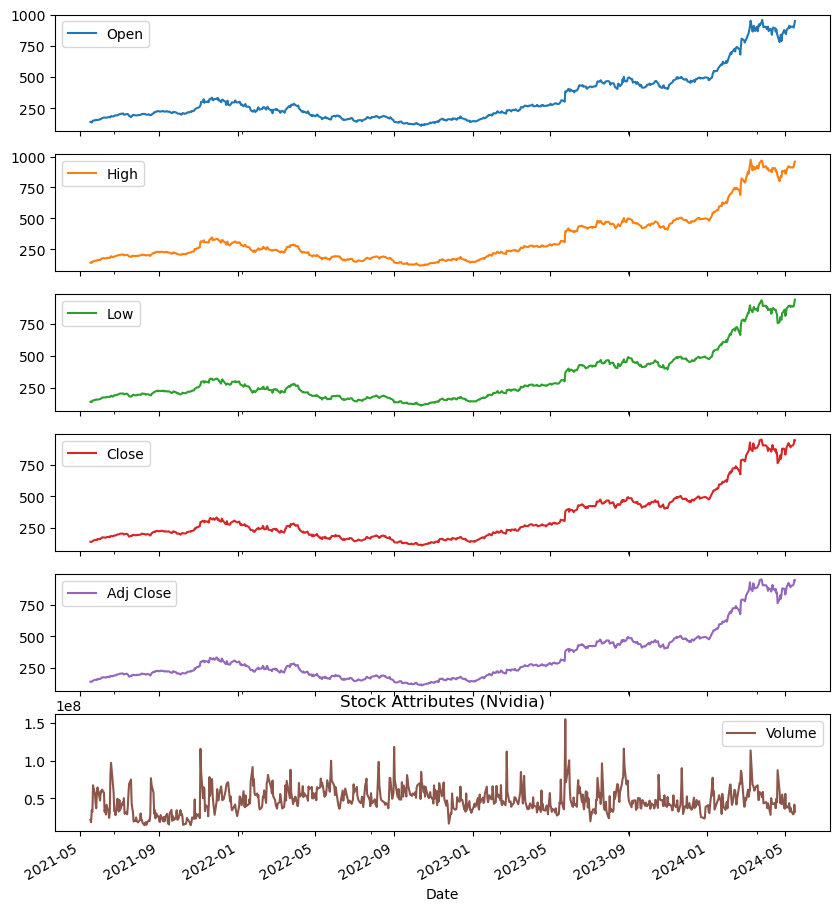

In [93]:
df_nvidia.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

In [4]:
fig = px.line(df_nvidia, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

It can be seen that the trends between all data points aside volume are largely the same. Little dilation from each other, this could mean that Nvidia has been on a steady rise throughout Covid but had a massive spike near 2024.

There was a spike in November 2021 that lines up with the rise of AI and ChatGPT. With GPUs being a major asset to running and processing AI. 

Judging from the chart, January 2022 to September 2022 was Nvidia's 52 week low after the US imposed restrictions on the export of AI chips to China and Russia. The 239% rise in 2023 would be due to the fervor over generative AI reaching a peak height. Nvidia skyrocketed again in 2024 over further AI demand. There are high chances that Nvidia may reach the $1000 stock price soon if it continues to rise. Right now residing between $900 to $800 per stock.

In [95]:
fig = px.line(df_nvidia, y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

We see one noticeable spikes in trades in May 2023. In 2024, the high cost in the stock may be the reason as to why it is so low in trade volume.

In [96]:
# Nvidia Candlestick Chart

fig = go.Figure(data=[go.Candlestick(x=df_nvidia.index, open=df_nvidia['Open'], high=df_nvidia['High'], low=df_nvidia['Low'], close=df_nvidia['Close'])])

fig.update_layout(title='Nvidia Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

Judging from the Candstick chart, stock prices had a high rise near the start of 2024 but began to make a noticeable decline in April 2024, this can be related to the AMD earnings report that caused a decline in stock for a period. 

Text(0.5, 1.0, 'Nvidia Moving Averages')

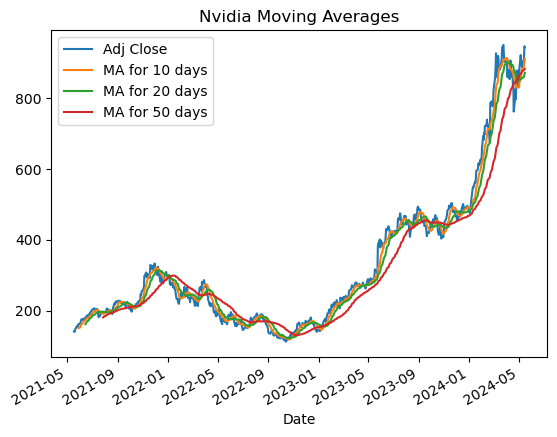

In [97]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_nvidia[column_name] = df_nvidia['Adj Close'].rolling(ma).mean()

df_nvidia[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title("Nvidia Moving Averages")

Based on the Moving Average Graph above, it can be seen that the moving average for 10 and 20 days is signaling a trend shift that connects with AMD's recent conference with investors that led to a drop in stocks by 3% for NVIDIA. 

Following the 50 day moving average, we can see that the data is doing better than the expected average aside from the sudden drop and recovery of the stock price.

#### Prediction Model For Nvidia

In [98]:
start = datetime(end.year - 5, end.month, end.day)
df_nvidia = pdr.get_data_yahoo('NVDA', start=start, end=end)

X = df_nvidia[['High', 'Low', 'Open']]  # Features
y = df_nvidia['Close']  # Target variable

data = df_nvidia.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

# data set for within 60 days
test_data = scaled_data[training_data_len - 60: , :]
test_set = []
for i in range(60, len(test_data)):
    test_set.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
test_set = np.array(test_set)

# Reshape the data
test_set = np.reshape(test_set, (test_set.shape[0], test_set.shape[1], 1 ))

prediction = model.predict(test_set)
scaled_pred = scaler.inverse_transform(prediction)

valid = data[training_data_len:]
valid['Predictions'] = scaled_pred

[*********************100%%**********************]  1 of 1 completed

Epoch 1/100


30/30 [==============================] - 2s 22ms/step - loss: 0.0399 - val_loss: 0.0038
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 6.6462e-04
Epoch 3/100
30/30 [==============================] - 0s 16ms/step - loss: 6.9811e-04 - val_loss: 4.6184e-04
Epoch 4/100
30/30 [==============================] - 0s 16ms/step - loss: 5.0312e-04 - val_loss: 5.5354e-04
Epoch 5/100
30/30 [==============================] - 0s 16ms/step - loss: 4.6519e-04 - val_loss: 4.4626e-04
Epoch 6/100
30/30 [==============================] - 0s 16ms/step - loss: 4.2508e-04 - val_loss: 4.6399e-04
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 4.3580e-04 - val_loss: 4.4120e-04
Epoch 8/100
30/30 [==============================] - 1s 18ms/step - loss: 3.7746e-04 - val_loss: 3.6240e-04
Epoch 9/100
30/30 [==============================] - 0s 16ms/step - loss: 3.6846e-04 - val_loss: 3.2169e-04
Epoch 10/100
30/30 [==============================] 

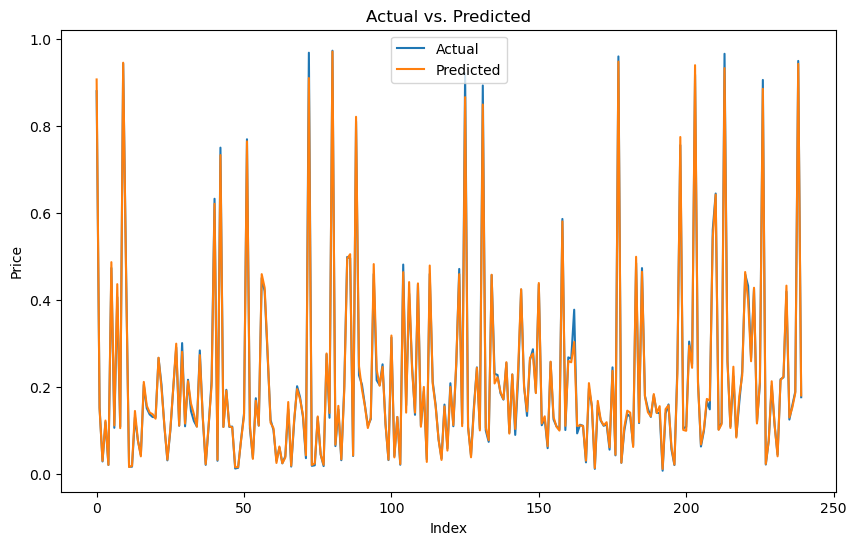

In [99]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

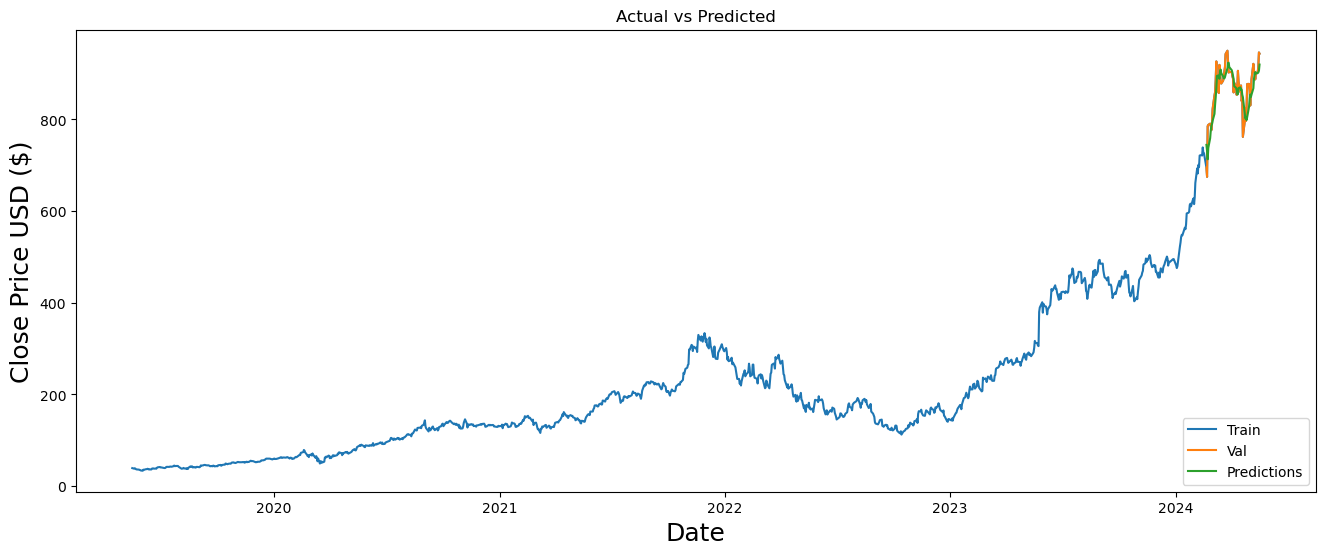

In [100]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_nvidia['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [101]:
valid

Close  Predictions
Date                               
2024-02-20  694.520020   744.511780
2024-02-21  674.719971   731.365967
2024-02-22  785.380005   713.082520
2024-02-23  788.169983   738.104187
2024-02-26  790.919983   759.083679
...                ...          ...
2024-05-10  898.780029   900.369507
2024-05-13  903.989990   901.148560
2024-05-14  913.559998   902.618469
2024-05-15  946.299988   906.262573
2024-05-16  943.590027   919.814941

[62 rows x 2 columns]

#### Prediction

In [102]:
future_days = 5

last_60_days = scaled_data[-60:]

x_predict = np.reshape(last_60_days, (1,60,1))

predicted_values = []
for _ in range(future_days):
    predicted_value = model.predict(x_predict)
    predicted_decimal = scaler.inverse_transform(predicted_value)
    
    predicted_values.append(predicted_decimal[0][0])
    
    x_predict = np.roll(x_predict, -1)
    x_predict[0, -1, 0] = predicted_value
    
print("Predicted Decimal Values for the Next", future_days, "Days:", predicted_values)

1/1 [==============================] - 0s 18ms/step
Predicted Decimal Values for the Next 5 Days: [927.9337, 927.43335, 926.09686, 923.92334, 920.96375]


#### Conclusion

Under my analysis, Nvidia would be ideal as a long-term investment. With its boom coming from the AI boom in late 2021. It has had moments of reaching lows such as in 2022 by outside factors such as the government. But early 2024 has seen the company have a large boom in its stock price, soaring to reach more than $900 dollars a few points in time in 2024. 

It may be an opportune time due to an uninspiring announcement by AMD that had also affected Nvidia too in 5/1/24, causing the stock to have a sudden drop however there is a high chance for it to continue to outperform for the rest of 2024. Predictions from the LSTM model show the stock prices already recovering. 

The stock prices will continue to rise over the demand of AI over time as Nvidia still stands in market as the forefront of the AI chip race. It seems that Nvidia will continue to rise while other companies are attempting to catch up.

### AMD

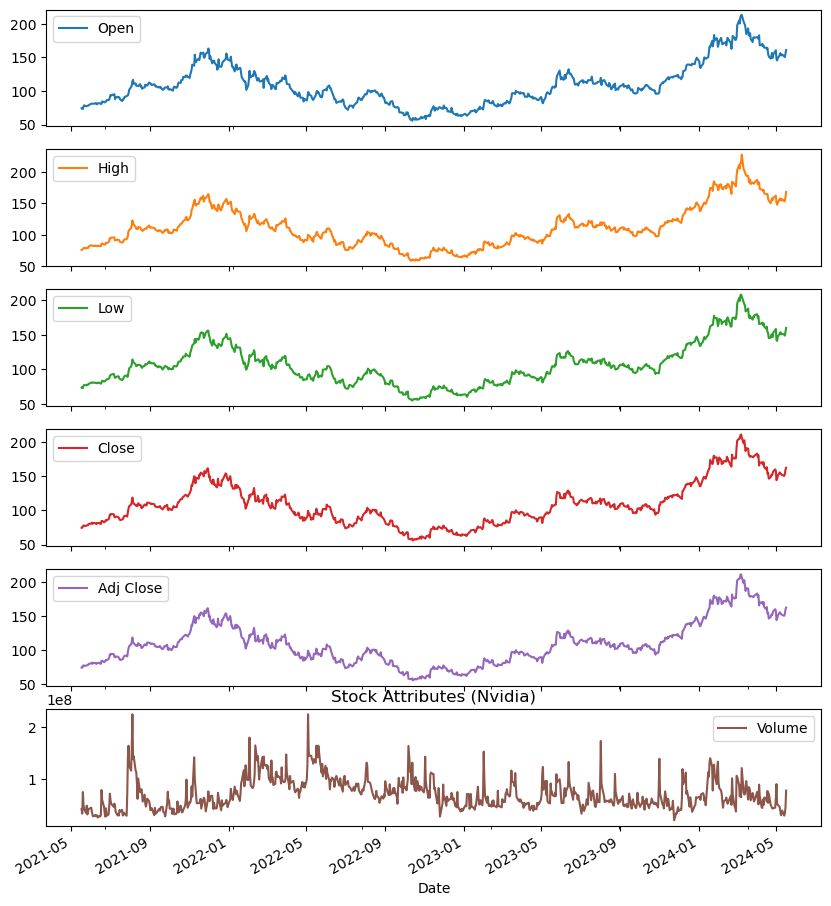

In [103]:
df_amd.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

In [5]:
fig = px.line(df_amd, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

Judging the Closing price, AMD has been experiencing volatile rise and drop in its price.

AMD in October 2022 reached its lowest stock price on the chart due reporting a 40% decline in its client segment (PCs) that was almost the entire reason for AMD's shortfall when the PC makert came to a standstill in the second half of summer in 2022.

AMD in March 2024 experienced a high rise in stock price due to their announcement of their MI300 series AI chip for HPC and generative AI. Leading many investors heavily invest into the stock over the AI craze. But such rapid growth may be unsustainable due to the stronger position their competitors may have such as Nvidia and if the company fails to meet expectations may lead to significant damage to the stock.

The most recent drop can be explained with AMD's struggle to impress Wall Street with its earnings season, investors were not impressed even amid the rise in AI demand. Leading to a near 9% drop in stock price and affecting other company stocks such as Nvidia with a 3% stock drop. 

In [105]:
fig = px.line(df_amd, y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

In [106]:
# AMD Candlestick Chart
# Further detailed chart evaluating noticeable drops and rises in data.

fig = go.Figure(data=[go.Candlestick(x=df_amd.index, open=df_amd['Open'], high=df_amd['High'], low=df_amd['Low'], close=df_amd['Close'])])

fig.update_layout(title='Nvidia Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

Starting March 2024, we can begin to see a downward slope begin to form following AMD reaching its peak in Stock Price. The drop in stock price could be attributed to AMD Stock price reaching $200 leading to some stock investors to begin to sell their stock.

Text(0.5, 1.0, 'AMD Moving Averages')

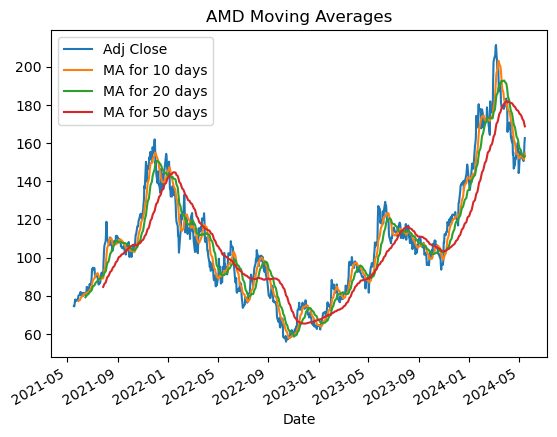

In [107]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_amd[column_name] = df_amd['Adj Close'].rolling(ma).mean()

df_amd[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title("AMD Moving Averages")

Based on the graph, the moving average for 10 and 20 days are following the trend on a downward line and having moments where the stock experiences worse than the expected average. Signaling us that the stock is beginning a negative slope after recent news regarding their earnings report and would be best to hold off selling if plans for the stock were short-term. The drop in stock price is worse than the expected moving average for 50 days, showing that it be a good time to invest into AMD before it can recover in the future.

#### Prediction Model For AMD

In [108]:
start = datetime(end.year - 5, end.month, end.day)
df_amd = pdr.get_data_yahoo('AMD', start=start, end=end)

X = df_amd[['High', 'Low', 'Open']]  # Features
y = df_amd['Close']  # Target variable

data = df_amd.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

# data set for within 60 days
test_data = scaled_data[training_data_len - 60: , :]
test_set = []
for i in range(60, len(test_data)):
    test_set.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
test_set = np.array(test_set)

# Reshape the data
test_set = np.reshape(test_set, (test_set.shape[0], test_set.shape[1], 1 ))

prediction = model.predict(test_set)
scaled_pred = scaler.inverse_transform(prediction)

valid = data[training_data_len:]
valid['Predictions'] = scaled_pred

[*********************100%%**********************]  1 of 1 completed

Epoch 1/100
 9/30 [========>.....................] - ETA: 0s - loss: 4.6453e-04

30/30 [==============================] - 0s 16ms/step - loss: 4.7706e-04 - val_loss: 4.1289e-04
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 4.8913e-04 - val_loss: 3.9149e-04
Epoch 3/100
30/30 [==============================] - 0s 15ms/step - loss: 4.5534e-04 - val_loss: 4.9594e-04
Epoch 4/100
30/30 [==============================] - 0s 17ms/step - loss: 4.9637e-04 - val_loss: 3.7270e-04
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 4.3119e-04 - val_loss: 5.0307e-04
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 5.0657e-04 - val_loss: 4.0568e-04
Epoch 7/100
30/30 [==============================] - 0s 15ms/step - loss: 4.5521e-04 - val_loss: 3.6087e-04
Epoch 8/100
30/30 [==============================] - 0s 15ms/step - loss: 4.2225e-04 - val_loss: 3.5270e-04
Epoch 9/100
30/30 [==============================] - 0s 15ms/step - loss: 4.2262e-04 - val_loss: 4.1716e-04
Epoch 10/100
30/30 [====================

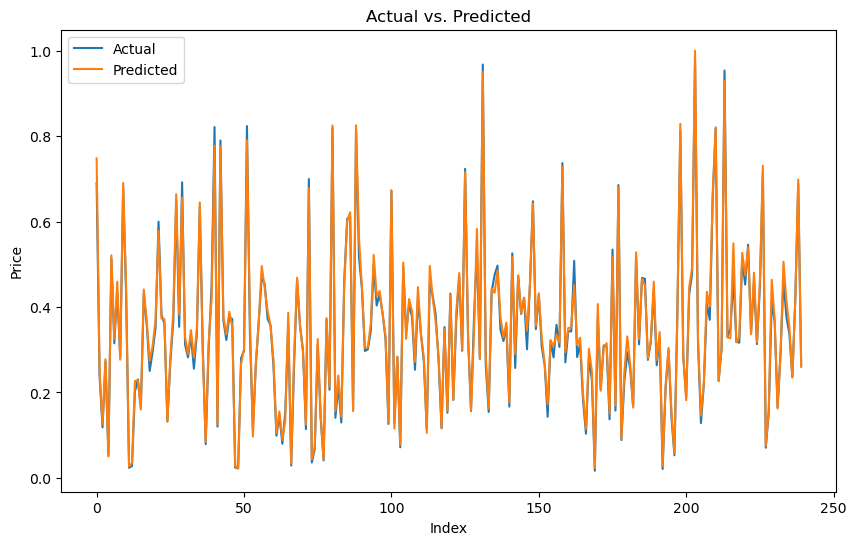

In [109]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

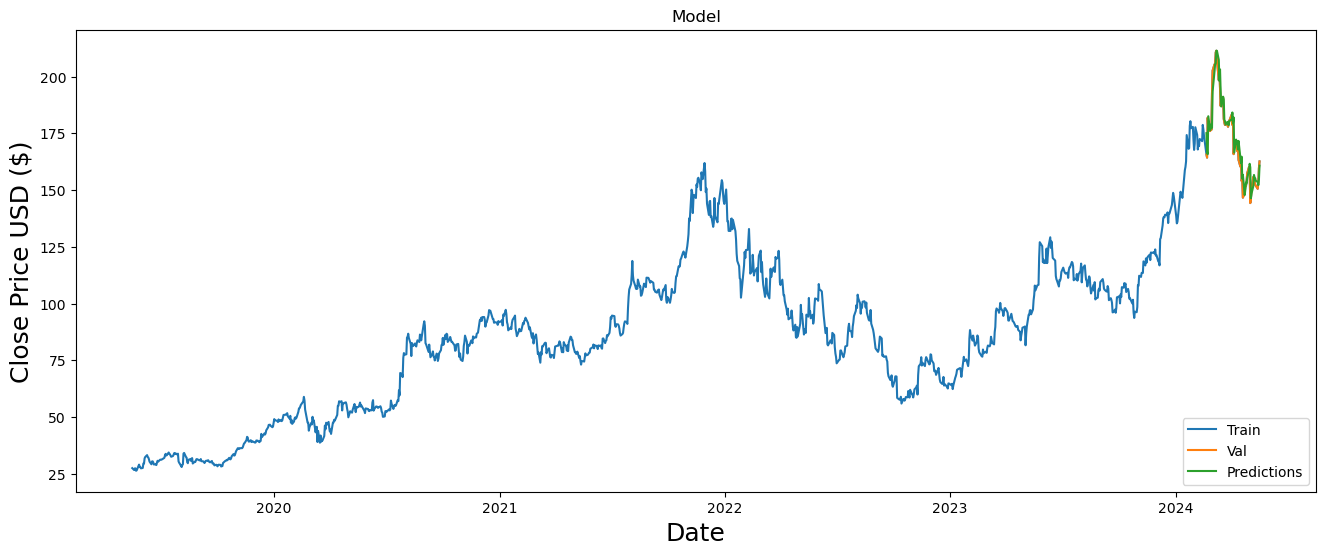

In [110]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_amd['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [111]:
valid

Close  Predictions
Date                               
2024-02-20  165.690002   175.072342
2024-02-21  164.289993   166.963470
2024-02-22  181.860001   165.791840
2024-02-23  176.520004   182.514160
2024-02-26  176.009995   176.368317
...                ...          ...
2024-05-10  151.919998   154.064102
2024-05-13  150.559998   153.591843
2024-05-14  153.160004   152.174179
2024-05-15  159.669998   154.641937
2024-05-16  162.619995   160.734116

[62 rows x 2 columns]

#### Prediction

In [112]:
future_days = 5

last_60_days = scaled_data[-60:]

x_predict = np.reshape(last_60_days, (1,60,1))

predicted_values = []
for _ in range(future_days):
    predicted_value = model.predict(x_predict)
    predicted_decimal = scaler.inverse_transform(predicted_value)
    
    predicted_values.append(predicted_decimal[0][0])
    
    x_predict = np.roll(x_predict, -1)
    x_predict[0, -1, 0] = predicted_value
    
print("Predicted Decimal Values for the Next", future_days, "Days:", predicted_values)

1/1 [==============================] - 0s 15ms/step
Predicted Decimal Values for the Next 5 Days: [163.55835, 164.81006, 166.22066, 167.5879, 168.86636]


#### Conclusion

From my results, there is reason to invest into AMD as a long-term investment. AMD's stock is facing a downward trend with its recent AI chip sales for 2024 falling short of expectations by Wall Street Investors compared to Nvidia beating its expectations.

Predictions from the model show the stock follow a downward trend for the next days following its drop in stock on May 1st. While it continues to drop, it will be an opportune time to invest into AMD's stock.

The AI trend will likely continue thanks to rapid development of AI which will fuel demand for semiconductor products. There is a high chance for AMD to rebound due to AI demand.

### Tesla

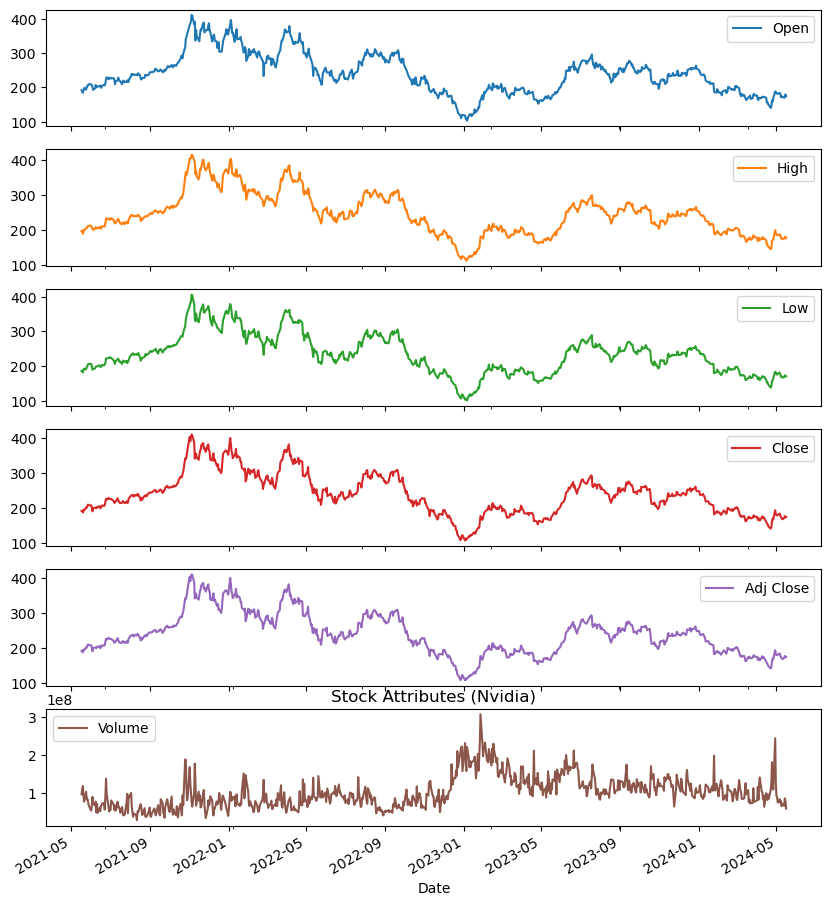

In [113]:
df_tsla.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

In [6]:
fig = px.line(df_tsla, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

Looking at the stock data, it can seen that Tesla is a very volatile stock market. Having many rises and falls in the past few years. 

In 2022, stock dropped significantly before January 2023 due to the announcement by Tesla of their delivery numbers being down, causing a significant drop in stock price. Being their first year-over-year sales drop since the early days of Covid in 2020.

In May 2023, despite its volatility, Tesla's stock doubled investor's money as it surged 101.7%. It is said that Tesla deliveries surged 38% with its lower priced models attributed for 98% of the surge in orders. Allowing for Tesla to meet two important targets which were delivering 1.8 million cars and starting production of the Cybertruck. With them meeting their goals and strong demand it drove Tesla's stock higher.

In April 2024, Tesla had a significant after it was revealed that the company's Autopilot feature had hit and killed a motorcyclist as well as a recall for Cybertrucks, leading to a drop in stock price.

In [115]:
fig = px.line(df_tsla, y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

In [116]:
# Tesla Candlestick Chart

fig = go.Figure(data=[go.Candlestick(x=df_tsla.index, open=df_tsla['Open'], high=df_tsla['High'], low=df_tsla['Low'], close=df_tsla['Close'])])

fig.update_layout(title='Tesla Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

Text(0.5, 1.0, 'Tesla Moving Averages')

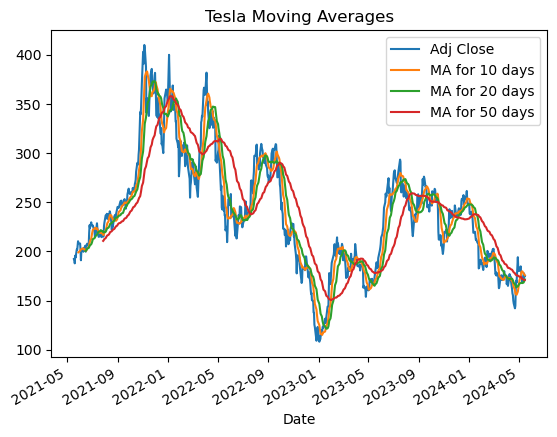

In [117]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_tsla[column_name] = df_tsla['Adj Close'].rolling(ma).mean()

df_tsla[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title("Tesla Moving Averages")

Following the Moving Average Chart, The moving average for 10 and 20 days is following the trend closely and beginning to show a turning point in recovery. The moving average for 50 days shows that the stock is doing worse than the moving average due to the volatility of the stock. Investing into the stock as it is experiencing worse than the 50 day moving average is a good option. Tesla has been experiencing good long term growth, due to its volatility it is not good for short-term investment.

#### Prediction Model for Tesla

In [118]:
start = datetime(end.year - 5, end.month, end.day)
df_tsla = pdr.get_data_yahoo('TSLA', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [119]:
X = df_tsla[['High', 'Low', 'Open']]  # Features
y = df_tsla['Close']  # Target variable

# Create new dataframe with only 'Close' column
data = df_tsla.filter(['Close'])
# convert dataframe to numpy array
dataset = data.values
# get number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(dataset)

# Create sequences
X, y = [], []
for i in range(len(scaled_prices) - window_size):
    X.append(scaled_prices[i:i+window_size])
    y.append(scaled_prices[i+window_size])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

# creating a new dataset to analyze within 60 days
test_data = scaled_prices[training_data_len - 60: , :]
test_set = []
for i in range(60, len(test_data)):
    test_set.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
test_set = np.array(test_set)

# Reshape the data
test_set = np.reshape(test_set, (test_set.shape[0], test_set.shape[1], 1 ))

prediction = model.predict(test_set)
scaled_pred = scaler.inverse_transform(prediction)

# Plot the data
valid = data[training_data_len:]
valid['Predictions'] = scaled_pred

Epoch 1/100
30/30 [==============================] - 0s 16ms/step - loss: 4.4146e-04 - val_loss: 5.4591e-04
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 4.0424e-04 - val_loss: 6.2875e-04
Epoch 3/100
30/30 [==============================] - 1s 17ms/step - loss: 4.3006e-04 - val_loss: 6.5087e-04
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 4.3443e-04 - val_loss: 5.0408e-04
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 4.0104e-04 - val_loss: 4.9261e-04
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 4.1404e-04 - val_loss: 5.0597e-04
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 4.1993e-04 - val_loss: 4.9592e-04
Epoch 8/100
30/30 [==============================] - 0s 15ms/step - loss: 4.2031e-04 - val_loss: 6.1648e-04
Epoch 9/100
30/30 [==============================] - 0s 16ms/step - loss: 4.1801e-04 - val_loss: 5.2266e-04
Epoch 10/100
30/30 [========

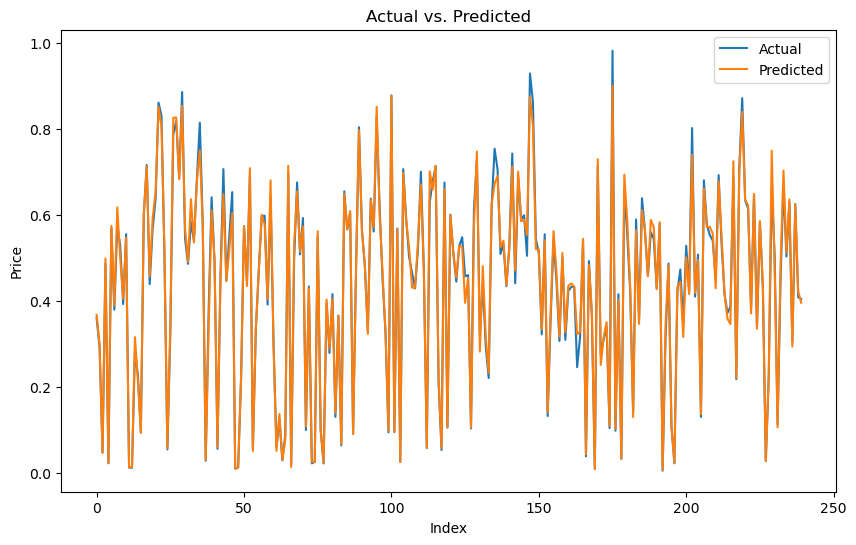

In [120]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

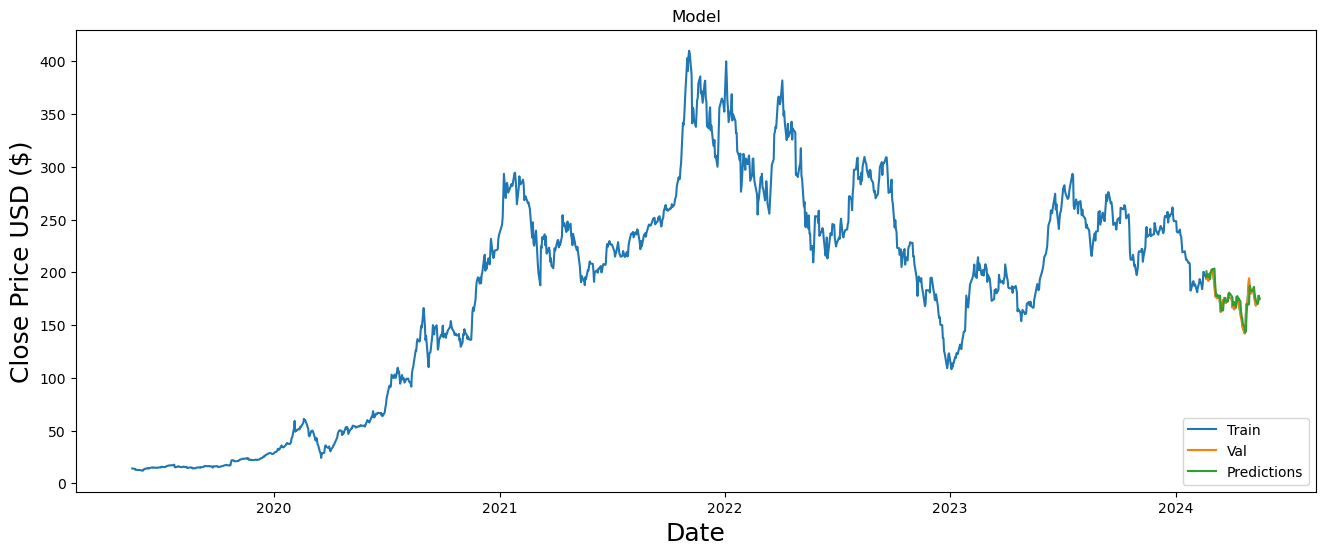

In [121]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_tsla['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [122]:
valid

Close  Predictions
Date                               
2024-02-20  193.759995   200.976334
2024-02-21  194.770004   195.370941
2024-02-22  197.410004   195.734192
2024-02-23  191.970001   198.258942
2024-02-26  199.399994   193.514282
...                ...          ...
2024-05-10  168.470001   173.416687
2024-05-13  171.889999   169.802658
2024-05-14  177.550003   172.343674
2024-05-15  173.990005   177.726135
2024-05-16  174.839996   175.183899

[62 rows x 2 columns]

#### Prediction

In [123]:
future_days = 5

last_60_days = scaled_prices[-60:]

x_predict = np.reshape(last_60_days, (1,60,1))

predicted_values = []
for _ in range(future_days):
    # Predict the next day
    predicted_value = model.predict(x_predict)
    predicted_decimal = scaler.inverse_transform(predicted_value)
    
    # Store the predicted value
    predicted_values.append(predicted_decimal[0][0])
    
    # Shift the input data by one day for the next prediction
    x_predict = np.roll(x_predict, -1)
    x_predict[0, -1, 0] = predicted_value  # Replace the last value with the predicted value

print("Predicted Decimal Values for the Next", future_days, "Days:", predicted_values)

1/1 [==============================] - 0s 16ms/step
Predicted Decimal Values for the Next 5 Days: [175.57921, 176.40276, 177.2699, 178.17178, 179.10622]


#### Conclusion

From my results, investing into Tesla stock is a good future long-term investment. Due to its high volatility, the stock is too unstable for a short-term investment. With recent stories regarding Tesla's AI and recall, it may prove a good time to invest while the stock tries to recover. Especially with Tesla's most recent earnings report resulted in an increase in stock price by 20%. 

For now, predictions show that the stock will continue to rise in the coming days. Especially with the impact of other companies and their announcements that led to a subsequent rise in stock price for a number of tech companies. It would be best to begin to ride Tesla's trend line as it begins to rise again.

### Google

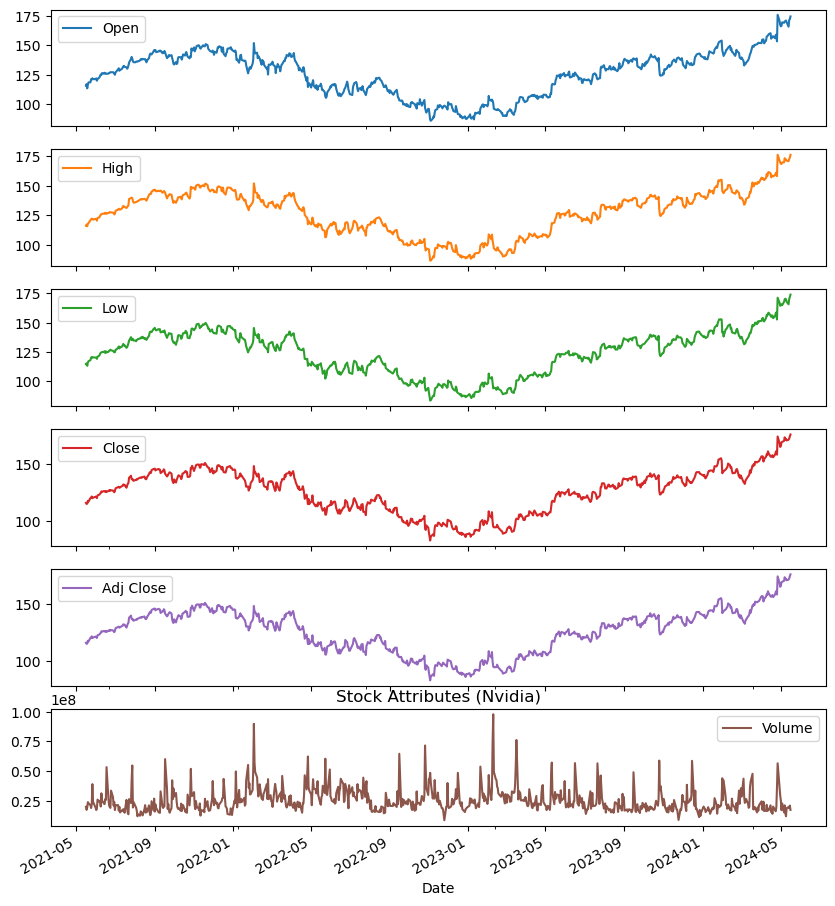

In [124]:
df_goog.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

In [7]:
fig = px.line(df_goog, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

Judging from the stock price data, Google has be experiencing a rising trend since its lowest stock point in November 2022. The reason for the drop in stock price around that time could be attributed to the stock split that occurred in July 2022. As well as concerns about macroeconomic headwinds were what pushed both stocks to experience a two-year low in November 2022. In April 2022, Google released a disappointing first-quarter earnings report that lead to a drop in stock price before facing a further downward trend after the stock split.

After its drop, Google has started to recover but is now currently experiencing a court case regarding Search Engine Monopoly that may affect the stock price deeply depending on the result as the trial winds down.

In [126]:
fig = px.line(df_goog, y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

In [127]:
# Google Candlestick Chart

fig = go.Figure(data=[go.Candlestick(x=df_goog.index, open=df_goog['Open'], high=df_goog['High'], low=df_goog['Low'], close=df_goog['Close'])])

fig.update_layout(title='Google Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

Text(0.5, 1.0, 'Google Moving Averages')

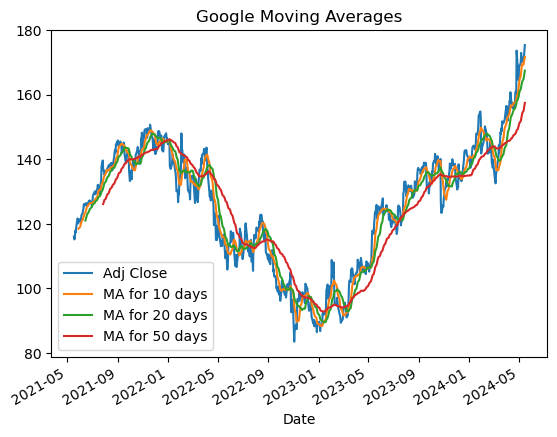

In [128]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_goog[column_name] = df_goog['Adj Close'].rolling(ma).mean()

df_goog[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title("Google Moving Averages")

Based on the graph above, the moving average for 10 and 20 days are following a downward trend. Based on the moving average for 10 days and 20 days, the price is experiencing worse than the expected average for the short term period. For the moving average of 50 days, the option of holding the stock is the best choice as the rises in stock price is doing better than the expected average aside from the sudden drops in stock price after earnings reports are released.

#### Prediction Model for Google

In [129]:
start = datetime(end.year - 5, end.month, end.day)
df_goog = pdr.get_data_yahoo('GOOG', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [130]:
X = df_goog[['High', 'Low', 'Open']]  # Features
y = df_goog['Close']  # Target variable

# Create new dataframe with only 'Close' column
data = df_goog.filter(['Close'])
# convert dataframe to numpy array
dataset = data.values
# get number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(dataset)

# Create sequences
X, y = [], []
for i in range(len(scaled_prices) - window_size):
    X.append(scaled_prices[i:i+window_size])
    y.append(scaled_prices[i+window_size])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

# creating a new dataset to analyze within 60 days
test_data = scaled_prices[training_data_len - 60: , :]
test_set = []
for i in range(60, len(test_data)):
    test_set.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
test_set = np.array(test_set)

# Reshape the data
test_set = np.reshape(test_set, (test_set.shape[0], test_set.shape[1], 1 ))

prediction = model.predict(test_set)
scaled_pred = scaler.inverse_transform(prediction)

# Plot the data
valid = data[training_data_len:]
valid['Predictions'] = scaled_pred

Epoch 1/100
30/30 [==============================] - 0s 17ms/step - loss: 3.2712e-04 - val_loss: 3.5290e-04
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 3.3027e-04 - val_loss: 3.3146e-04
Epoch 3/100
30/30 [==============================] - 1s 17ms/step - loss: 3.0951e-04 - val_loss: 3.6100e-04
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 3.0959e-04 - val_loss: 3.1959e-04
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 3.0702e-04 - val_loss: 3.1738e-04
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 3.1100e-04 - val_loss: 3.1597e-04
Epoch 7/100
30/30 [==============================] - 0s 15ms/step - loss: 3.1148e-04 - val_loss: 3.1631e-04
Epoch 8/100
30/30 [==============================] - 0s 16ms/step - loss: 3.0131e-04 - val_loss: 3.2562e-04
Epoch 9/100
30/30 [==============================] - 0s 15ms/step - loss: 3.1473e-04 - val_loss: 3.2992e-04
Epoch 10/100
30/30 [========

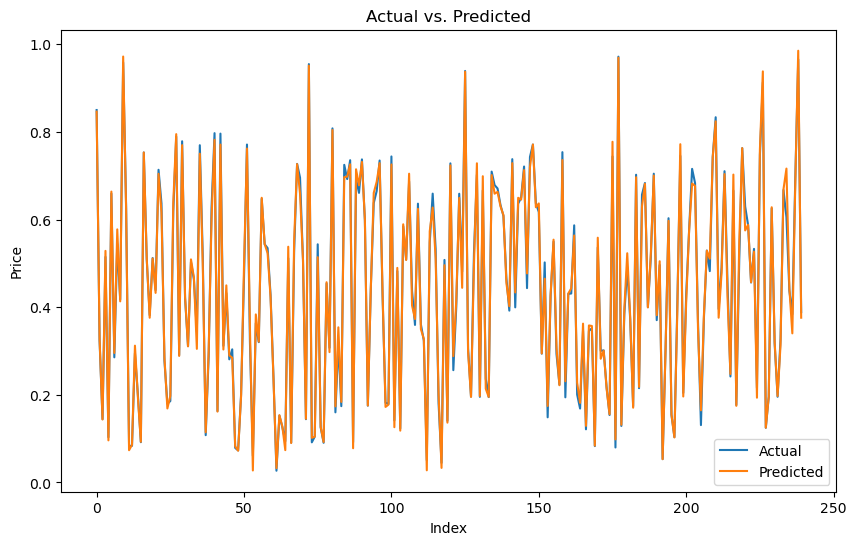

In [131]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

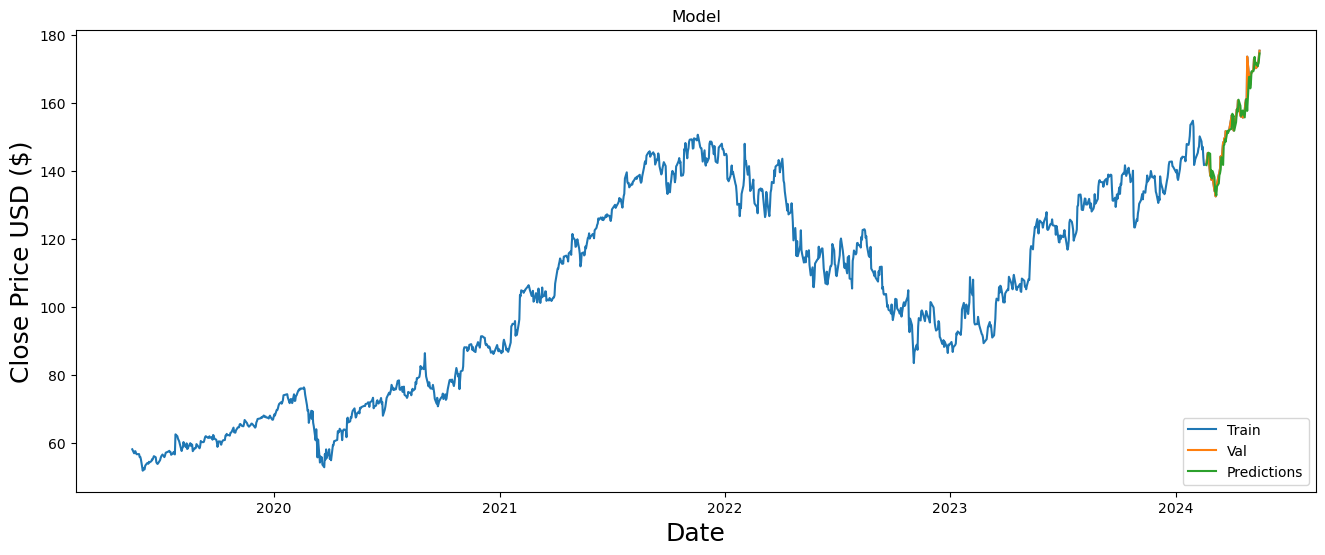

In [132]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_goog['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [133]:
valid

Close  Predictions
Date                               
2024-02-20  142.199997   141.754654
2024-02-21  143.839996   142.540894
2024-02-22  145.320007   144.206253
2024-02-23  145.289993   145.419113
2024-02-26  138.750000   145.124115
...                ...          ...
2024-05-10  170.289993   171.966949
2024-05-13  170.899994   170.885193
2024-05-14  171.929993   171.628448
2024-05-15  173.880005   172.743988
2024-05-16  175.429993   174.618103

[62 rows x 2 columns]

#### Prediction

In [134]:
future_days = 5

last_60_days = scaled_prices[-60:]

x_predict = np.reshape(last_60_days, (1,60,1))

predicted_values = []
for _ in range(future_days):
    # Predict the next day
    predicted_value = model.predict(x_predict)
    predicted_decimal = scaler.inverse_transform(predicted_value)
    
    # Store the predicted value
    predicted_values.append(predicted_decimal[0][0])
    
    # Shift the input data by one day for the next prediction
    x_predict = np.roll(x_predict, -1)
    x_predict[0, -1, 0] = predicted_value  # Replace the last value with the predicted value

print("Predicted Decimal Values for the Next", future_days, "Days:", predicted_values)

1/1 [==============================] - 0s 16ms/step
Predicted Decimal Values for the Next 5 Days: [176.0101, 176.43127, 176.90604, 177.51154, 178.18689]


#### Conclusion

From my results, it would be a good choice to invest into Google as safe choice. Google holds a strong place in the stock market and tech industry and not having a too saturated stock market price to make it reasonable to invest into. A return in investment will be seen if the stock is held as a long-term investment to truly see its worth. 

For now, from predictions and relevant news regarding Google's antitrust case, Google's stock will possibly see a downward trend for a small point in the stock market, especially after the earnings report where some investors may sell their stocks depending on how they feel about the report. Google stock has been seen to rise in correlation with other companies such as Apple, Microsoft, and Nvidia. Helping Google rise in stock faster after any good news from other relevant companies.

# Report (5-6 to 5-10) Week 2

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from datetime import datetime

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM

from pandas_datareader import data as pdr
yf.pdr_override()

Analysis for 2 groups with a focus to see if there is a connection between these companies and if they are worth investing into regarding their respective industries
Apple, Google, Microsoft

Nvidia, AMD, Intel

In [8]:
cpu_list = ['NVDA', 'INTC','AMD']

comp_list = ['MSFT','GOOG', 'AAPL']

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

In [9]:
for stock in cpu_list:
    globals()[stock] = yf.download(stock, start, end)

df_nvda = globals()['NVDA']
df_amd = globals()['AMD']
df_intc = globals()['INTC']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
for stock in comp_list:
    globals()[stock] = yf.download(stock, start, end)

df_msft = globals()['MSFT']
df_goog = globals()['GOOG']
df_aapl = globals()['AAPL']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
globals()['GS'] = yf.download('GS', start, end)
df_gs = globals()['GS'] 

[*********************100%%**********************]  1 of 1 completed


#### Model Preparation 

Spreads data to five years instead of three years

In [140]:
def preprocess_data(stock_symbol, epochs=100, batch_size=32, window_size=60):
    # Fetch data
    end = datetime.now()
    start = datetime(end.year - 5, end.month, end.day)
    df = pdr.get_data_yahoo(stock_symbol, start=start, end=end)

    data = df.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * .95))

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(dataset)

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size])

    X, y = np.array(X), np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1)),
    Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    # Make predictions
    test_data = scaled_data[training_data_len - window_size:, :]
    test_set = []
    for i in range(window_size, len(test_data)):
        test_set.append(test_data[i-window_size:i, 0])

    test_set = np.array(test_set)
    test_set = np.reshape(test_set, (test_set.shape[0], test_set.shape[1], 1))

    prediction = model.predict(test_set)
    scaled_pred = scaler.inverse_transform(prediction)

    # Prepare results
    valid = data[training_data_len:]
    valid['Predictions'] = scaled_pred

    return df, valid, scaled_pred

## Analysis of Intel, Nvidia, and AMD - Chip Industry

### Closing Prices

In [17]:
col_nvda = df_nvda['Adj Close']
col_amd = df_amd['Adj Close']
col_intc = df_intc['Adj Close']

col_df = pd.concat([col_nvda, col_amd, col_intc], axis=1)
col_df.columns = ['NVDA', 'AMD', 'INTC']

#### Performance Summary

In [18]:
fig = px.line(col_df, y=['NVDA', 'AMD', 'INTC'], title = 'Closing Prices of Stocks')
fig.show()

To be seen in the chart above, Nvidia's stock performance feels unnatural considering the stock performance of chipmaker companies. There is a possibility that Nvidia's stock may drop once it reaches the 1k dollar peak considering how close it is.

#### Individual Performance

In [143]:
fig_nvda = px.line(df_nvda, y=['Adj Close'], title='Nvidia Stock Performance')

fig_amd = px.line(df_amd, y=['Adj Close'], title='AMD Stock Performance')

fig_intc = px.line(df_intc, y=['Adj Close'], title='Intel Stock Performance')

In [144]:
fig_nvda.show()
fig_amd.show()
fig_intc.show()

It can be seen that there are certain drops in stock price for each company on the same day. Such as March 7th 2024, where each stock had its price experience a suddden spike in the semiconductor industry when Broadcom (AVGO) had its price target raised. 

It can be noticed that any annoucement in the industry can deeply affect other stock prices.

### Simple Moving Average (SMA)

Moving Average is used to smooth out the price data by creating an updated average price. Allowing us to see if the stock is going below the average due to fluctuations or random impacts in a certain time frame.

100 days can be used to represent a smaller price compared to the rest of the year. 

50 days represent a level that the stock is best to go under. 

10 days represent a close following of the stock and capture trends.

In [145]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_nvda[column_name] = df_nvda['Adj Close'].rolling(ma).mean()
    df_amd[column_name] = df_amd['Adj Close'].rolling(ma).mean()
    df_intc[column_name] = df_intc['Adj Close'].rolling(ma).mean()


Text(0.5, 1.0, 'Intel Moving Average')

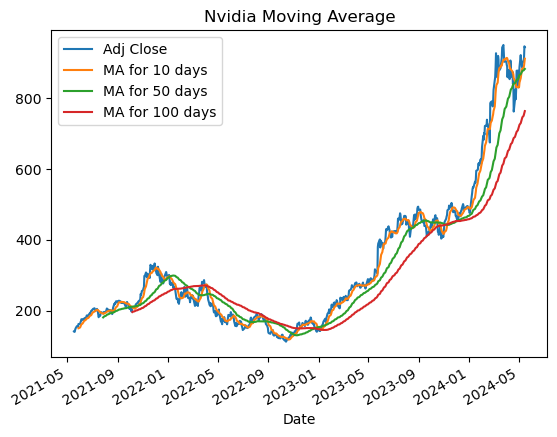

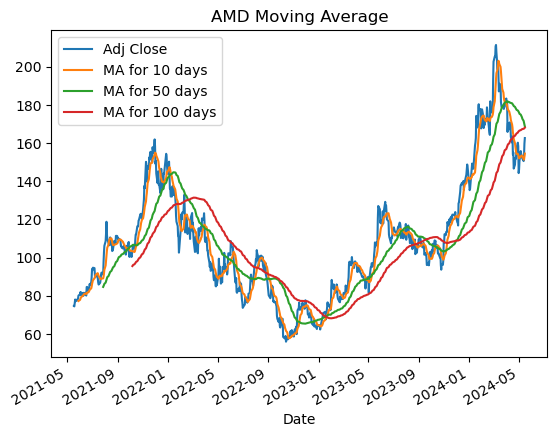

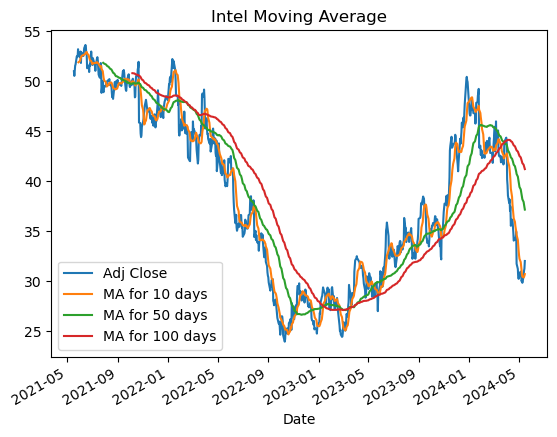

In [146]:
df_nvda[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Nvidia Moving Average")

df_amd[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("AMD Moving Average")

df_intc[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Intel Moving Average")

### Volatility Calculation

Volatility Calculation measures the change in variance in a stock's return. This can be used to compare the level of risk for stocks and comparison.

In [147]:
min_periods = 75
vol_nvda = df_nvda['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)
vol_amd = df_amd['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)
vol_intc = df_intc['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)

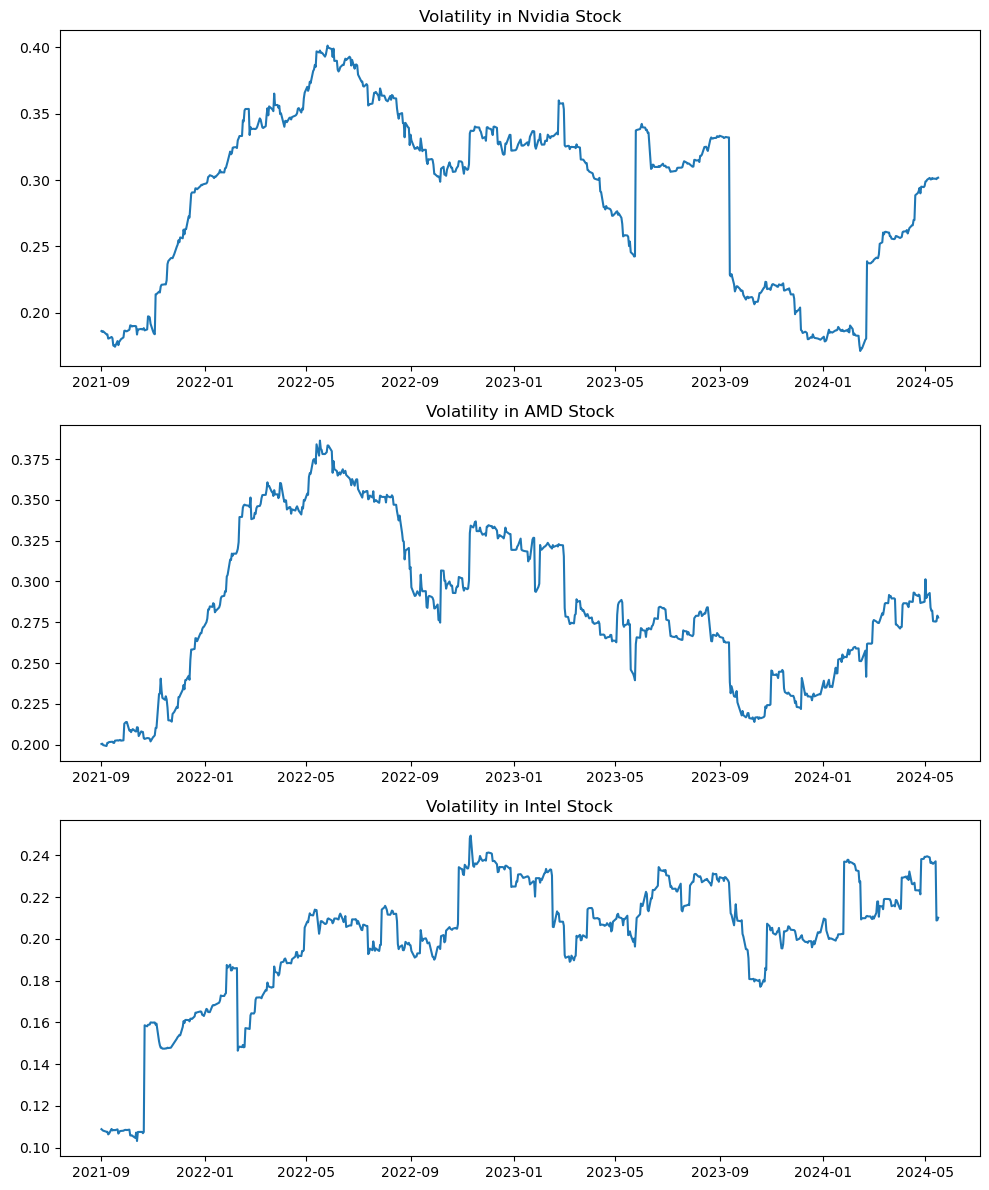

In [148]:
fig, axs = plt.subplots(3, 1, figsize=(10,12))

axs[0].plot(vol_nvda)
axs[0].set_title('Volatility in Nvidia Stock')

axs[1].plot(vol_amd)
axs[1].set_title('Volatility in AMD Stock')

axs[2].plot(vol_intc)
axs[2].set_title('Volatility in Intel Stock')

plt.tight_layout()
plt.show()

Based on the Volatiliy charts, it can be seen the correlation that the 3 companies may have. Although Intel does not seem as closely reactive as compared to the similar points of rise and falls that Nvidia and AMD have. 

The most notable point of correlation is 2022-01 to 2022-09 where we can see a noticeable rise and in stock volatility and then seeing it significantly fall around the same time for both. There is a better seen correlation between AMD and Intel in certain points in time as well such as 2023-05 to 2023-09 as well.

But overall between all three companies, we can see points in time where each stock would have a significant rise or drop in their own way at the same time such as 2023-09 for each company. 

Nvidia is seen to have the most active volatility out of the three available stocks with its sudden drops and rises. 

### Daily Return

In [149]:
daily_close = df_nvda['Adj Close']
daily_pct_nvda = daily_close.pct_change()
daily_pct_nvda.fillna(0,inplace=True)

daily_close = df_amd['Adj Close']
daily_pct_amd = daily_close.pct_change()
daily_pct_amd.fillna(0,inplace=True)

daily_close = df_intc['Adj Close']
daily_pct_intc = daily_close.pct_change()
daily_pct_intc.fillna(0,inplace=True)

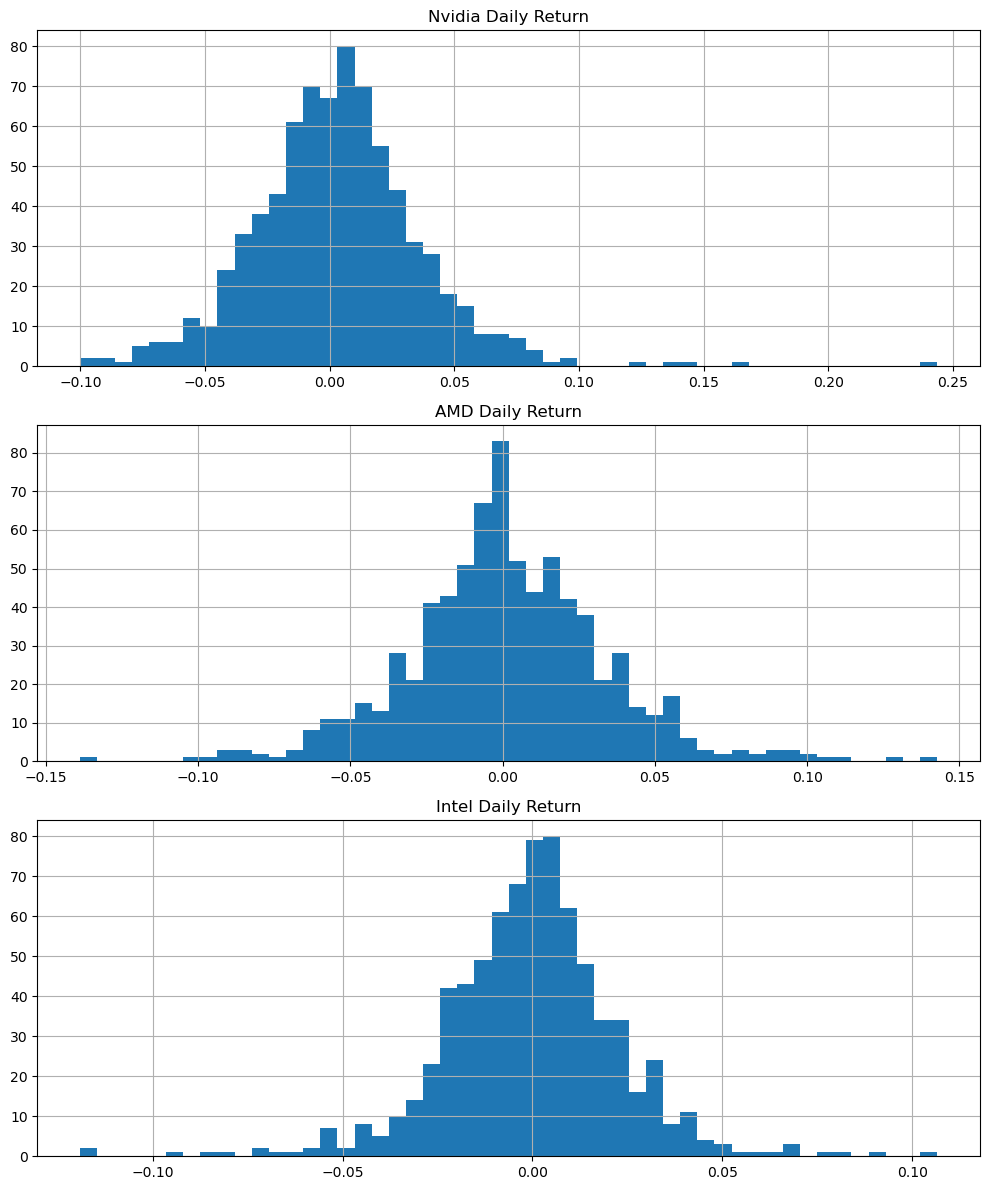

In [150]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

daily_pct_nvda.hist(ax=axs[0], bins=50)
axs[0].set_title('Nvidia Daily Return')

daily_pct_amd.hist(ax=axs[1], bins=50)
axs[1].set_title('AMD Daily Return')

daily_pct_intc.hist(ax=axs[2], bins=50)
axs[2].set_title('Intel Daily Return')

plt.tight_layout()
plt.show()

### Prediction

#### Nvidia Prediction

In [151]:
df_nvda_5, valid_nvda, pred_nvda = preprocess_data(cpu_list[0])

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 0s 6ms/step


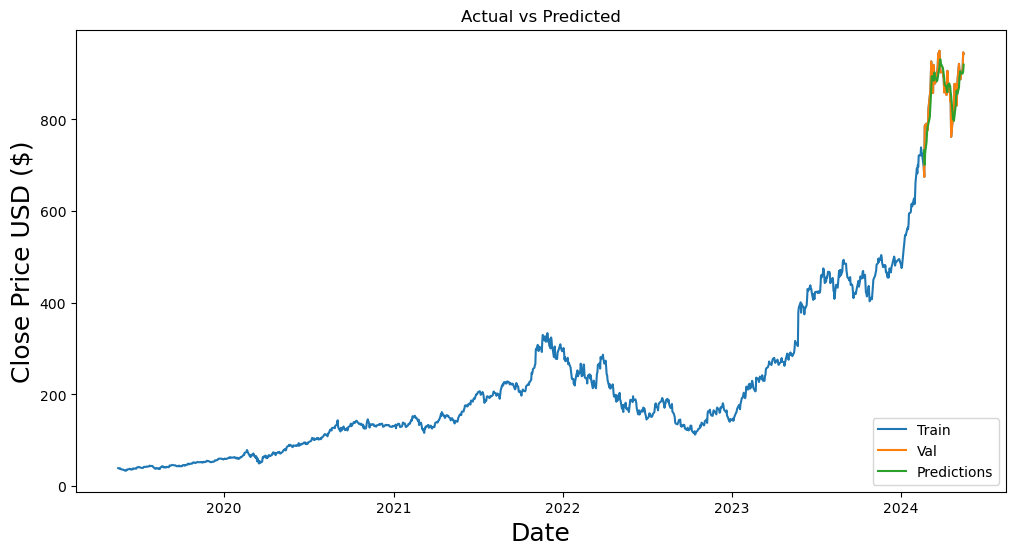

In [152]:
# Visualize the data
plt.figure(figsize=(12,6))
plt.title('Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_nvda_5['Close'])
plt.plot(valid_nvda[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# df_nvda_5 shows the real closing prices, Val from valid_nvda is the testing data portion used to test if the model can accurately predict the closing price, Predictions are the real predictions from the model. 100 epochs gives the best accuracy while saving time.

In [153]:
# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_nvda_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_nvda[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

Hold the stock.


#### AMD Prediction

In [154]:
df_amd_5, valid_amd, pred_amd = preprocess_data(cpu_list[2])

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 0s 6ms/step


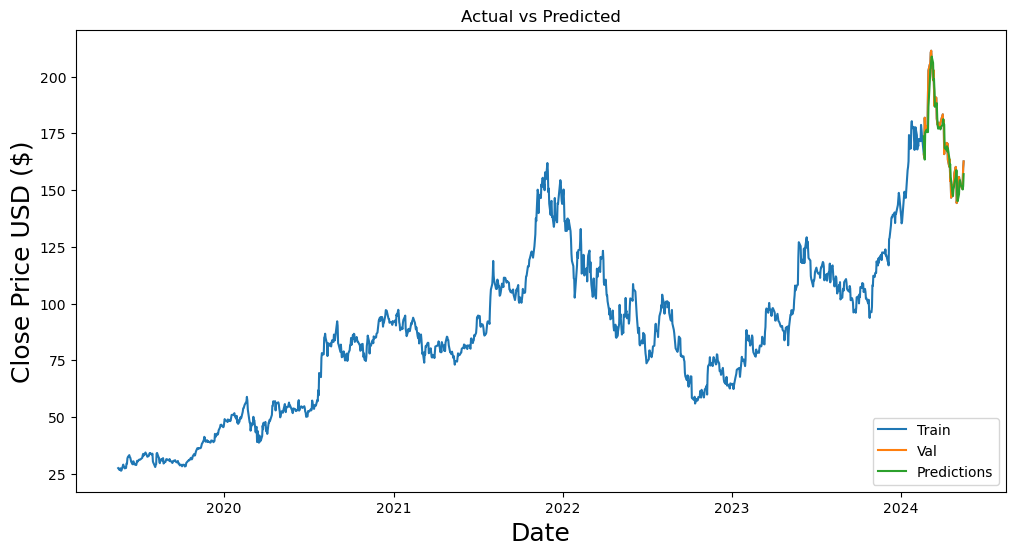

In [155]:
# Visualize the data
plt.figure(figsize=(12,6))
plt.title('Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_amd_5['Close'])
plt.plot(valid_amd[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [156]:
# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_amd_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_amd[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

Consider selling the stock.


#### Intel Prediction

In [157]:
df_intc_5, valid_intc, pred_intc = preprocess_data(cpu_list[1])

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 0s 5ms/step


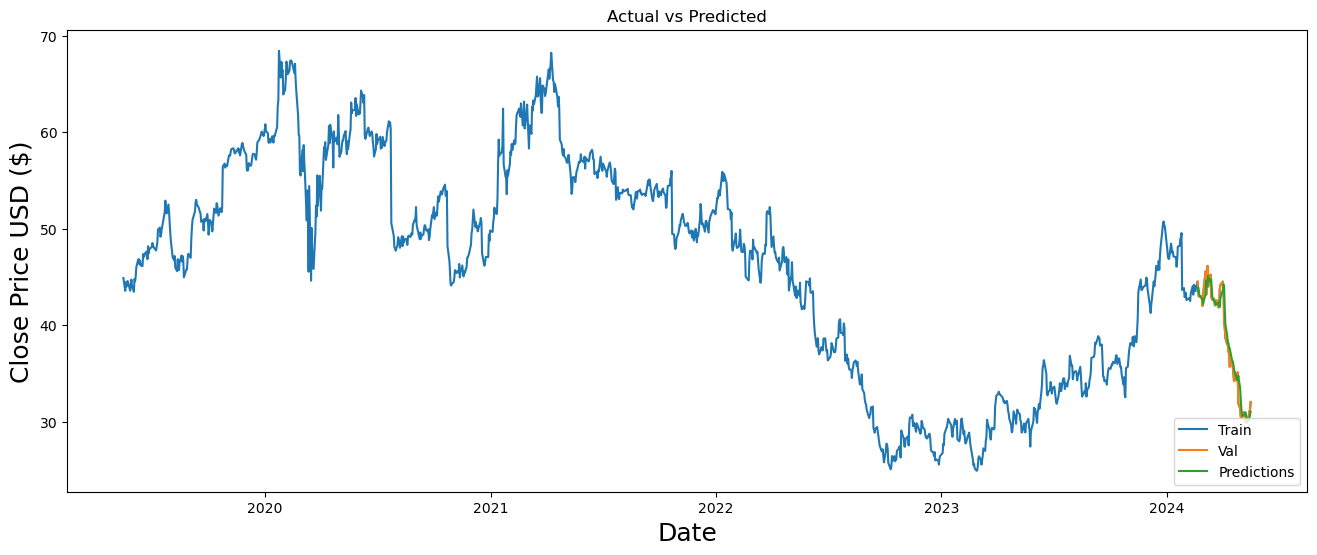

In [158]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_intc_5['Close'])
plt.plot(valid_intc[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [159]:
# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_intc_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_intc[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

Consider selling the stock.


### Conclusion

When analyzing the correlation between the three stocks and their performance, Nvidia is still a viable good choice for futher investment considering its ever increasing price, it is also a good option to sell as well or hold onto the current amount of the stock considering how fast the stock is rising. A return in investment would be seen due to it's unnatural rise and how close it is to reaching $1000 dollars, there is a possibility that most would sell and thus causing the stock to drop to a more investable level if you choose to wait. Only invest if you have the funds to purchase such an expensive stock. 

AMD and Intel are not as well performing as compared to Nvidia but hold a more reasonable price and promise. Among both AMD and Intel, Intel does not show the same promise it used to have 3 years before, reaching the lowest it has ever been within the last 5 years. Compared to its competitors, Intel does not have a strong foothold in the Chipmaker market as compared to Nvidia and AMD and has been struggling to recover or even catch up to AMD. Holding onto any stock you may have is the best course of action considering there is a chance it may rise again given Intels reputation. If you choose to buy right now, Intel will most likely still be going down given its trend line so it would be best to wait still.

This leads to the conclusion following predictions and stock history, that AMD may be a wise further investment strategy. Considering its still viable position in the Chip market and how close its performance in stock volatility it is to Nvidia. It has the capability to rise higher in stock price and provide a return in investment. Whenever Nvidia will experience a significant rise in the market, AMD will also feel it as well. Although the same can go for Intel, its performance proves it struggles to return to the glory it used to have in the market. Given the prediction and AMD's current trend line, the decision to hold onto your available stock is a good approach. However it can be seen that AMD's trend line is beginning to curve back up again. Making it a good choice to invest now before it recovers or hold onto any stock that you already have. 

From this analysis, I have chosen to hold my stock for Nvidia, not to buy Intel stock, and decide to further invest into AMD given its chance to recover and close connection to Nvidia. These Decisions were done in 5/10/24.

## Analysis of Apple, Google, Microsoft - The Popular Staple Tech Companies

### Closing Prices

In [14]:
col_msft = df_msft['Adj Close']
col_goog = df_goog['Adj Close']
col_aapl = df_aapl['Adj Close']

col_df = pd.concat([col_msft,col_goog,col_aapl], axis=1)
col_df.columns = ['MSFT','GOOG', 'AAPL']

#### Performance Summary

In [15]:
fig = px.line(col_df, y=['MSFT','GOOG', 'AAPL'], title='Closing Prices of Stocks')
fig.show()

To be seen in the chart above, Microsoft's stock is seen to manage far better as compared to the other popular tech company stocks in the market such as Google, and Apple. With most of the other stocks remaning around the same range between 150 - 200 dollars. One example for Microsoft's high stocks may be because Microsoft holds itself as the staple for standard computers considering many people use Windows for a variety of purposes. Apple Macs and Google Chromebooks hold their own respective audience as well but can either cost too much or not hold as much use as compared to a Windows machine. 

#### Individual Performance

In [162]:
fig_msft = px.line(df_msft, y=['Adj Close'], title='Microsoft Stock Performance')

fig_goog = px.line(df_intc, y=['Adj Close'], title='Google Stock Performance')

fig_aapl = px.line(df_aapl, y=['Adj Close'], title='Apple Stock Performance')

In [163]:
fig_msft.show()
fig_goog.show()
fig_aapl.show()

In terms of individual stock performance, we can see a clear picture in how the companies are handling in the industry right now. Microsoft is doing great in its stock performance over the years with its gradual rise. Releasing a great earnings report in March 31st 2024 that shows their revenue was 61.9 billion dollars and increased by 17% as well as their operating income and net income increasing by 23% and 20% respectively. Setting itself to be the most valuable company in the world, overtaking Apple. 

Google stock performance has been able to recover over the years. Experiencing a low in stock price in 2023 after investors disliked their earnings report. Causing a "two-day selloff" in tech stocks. Google was able to recover for a short period of time but is now facing another downward trend. The reason being is because of the worries of AI. After experiencing controversial errors with their Gemini AI regarding racist views of individuals. Google experienced a stock fall of 2.8%.

Apple stock can be seen to be managing better than Google although experiencing its own lows in correlation to earnings reports that drop around those times. Experiencing a revenue slide in 2023 which was due to reports stating four straight quarters of declining sales. Aligning with the hardware troubles that Apple experienced in 2023 with their smartphones and PCs especially with their controversy with their new series of smartphones, they were able to drastically recover during Summer 2023. Their stock recently having a spike up after announcing their new M4 chip.

Considering Apple competition with Microsoft, there is a correlatio between the two companies that causes a stock to either drop or rise depending on the other company's annoucements. One such example is an article regarding the "AI revolution" and its approach to our lives coming in faster than ever anticipated. This article lead to a 0.69% drop in stock for Apple but a rise by 0.59% for Microsoft. As well as a drop in stock for Google by 0.75% regarding OpenAI's annoucement that may steal the hype for Google I/O. Overall, it may seem that Microsoft is viewed as a default safe choice considering it's popularity, reputation, and handle on multiple industries that allow them to be a good investment choice compared to other big name companies. Whenever something come that may affect companies such as Apple or Google, Microsoft experiences a small rise in stock price from it.


### Simple Moving Average (SMA)

Moving Average is used to smooth out the price data by creating an updated average price. Allowing us to see if the stock is going below the average due to fluctuations or random impacts in a certain time frame.

100 days can be used to represent a smaller price compared to the rest of the year. 

50 days represent a level that the stock is best to go under. 

10 days represent a close following of the stock and capture trends.

In [164]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_msft[column_name] = df_msft['Adj Close'].rolling(ma).mean()
    df_goog[column_name] = df_goog['Adj Close'].rolling(ma).mean()
    df_aapl[column_name] = df_aapl['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'Apple Moving Average')

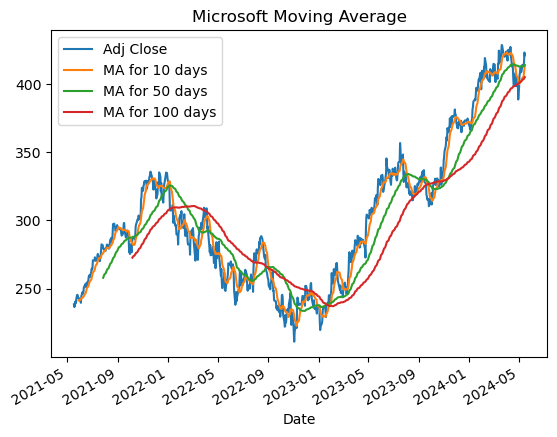

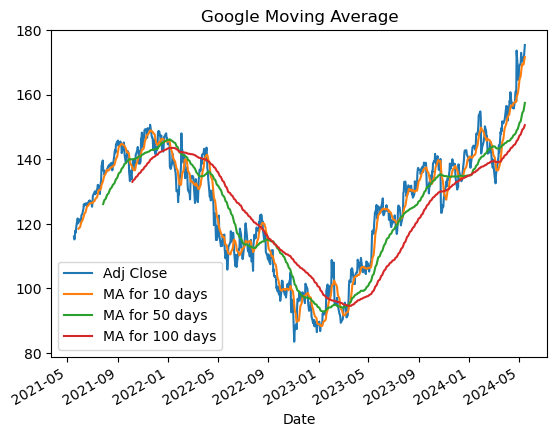

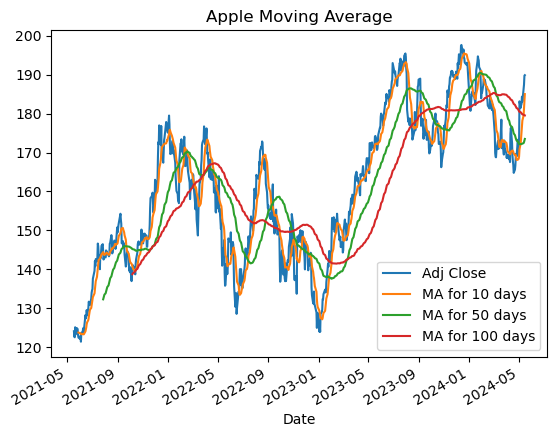

In [165]:
df_msft[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Microsoft Moving Average")

df_goog[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Google Moving Average")

df_aapl[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Apple Moving Average")

### Volatility Calculation

Volatility Calculation measures the change in variance in a stock's return. This can be used to compare the level of risk for stocks and comparison.

In [166]:
min_periods = 75
vol_msft = df_msft['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)
vol_goog = df_goog['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)
vol_aapl = df_aapl['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)

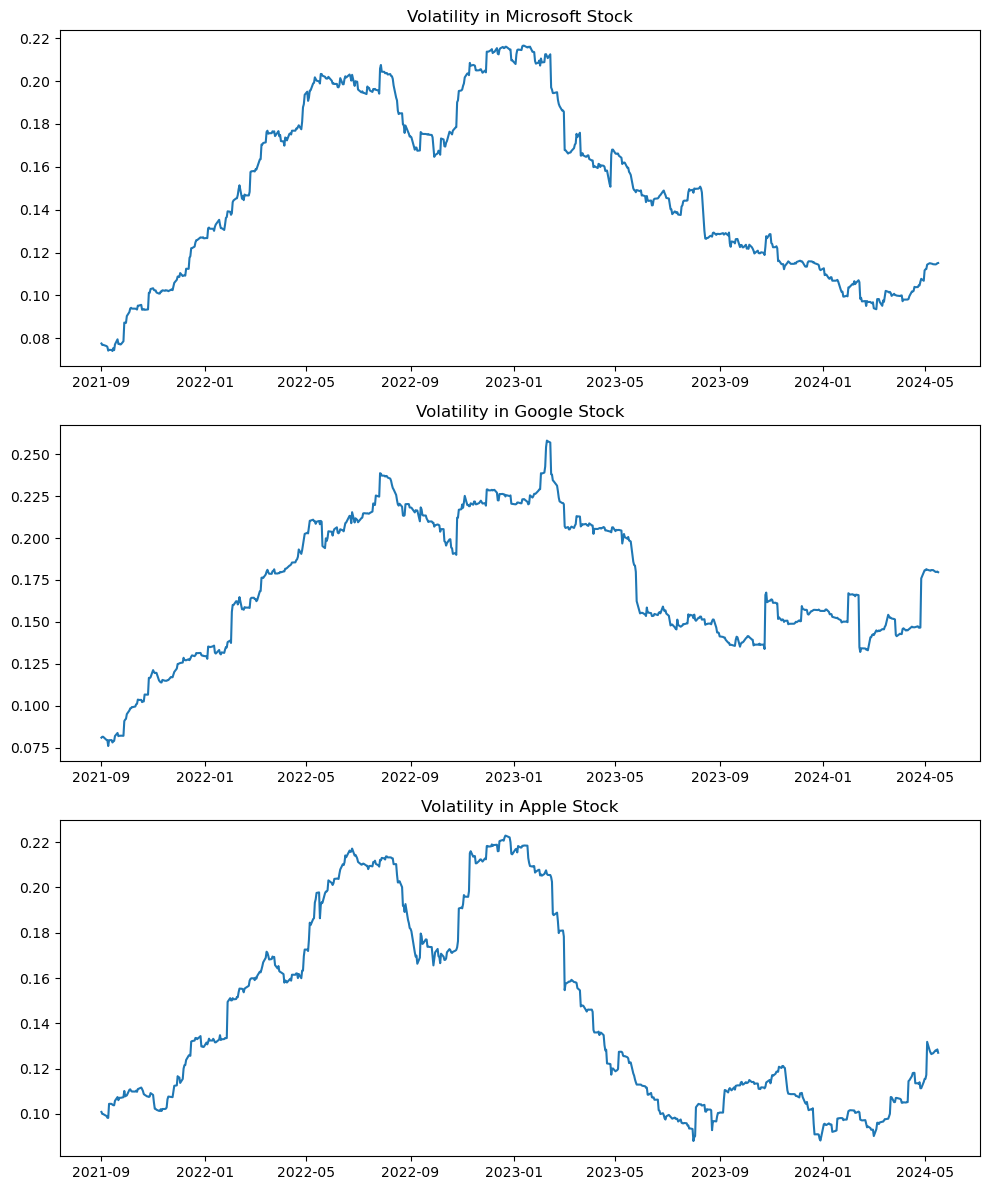

In [167]:
fig, axs = plt.subplots(3, 1, figsize=(10,12))

axs[0].plot(vol_msft)
axs[0].set_title('Volatility in Microsoft Stock')

axs[1].plot(vol_goog)
axs[1].set_title('Volatility in Google Stock')

axs[2].plot(vol_aapl)
axs[2].set_title('Volatility in Apple Stock')

plt.tight_layout()
plt.show()

Viewing the volatility of each stock, Microsoft is seen to surprisingly stablize and reduce in volatility considering it rise in stock seen in the previous table regarding the closing price of stocks. As compared to the volatility seen in Google and Apple, Apple experienced incredible spikes between 2022 and 2023 but then experienced a drop in volatility to present day that is only now increaseing, reflecting the moving average as it is now experiencing a upward trend and beginning to beat it's moving average.

Google has experienced the most significant volatitlity to present day in coreelation to its moving average, Google has a chance in increasing in stock price and going past its average and reaching a positive trend. Leading more to invest and increase the stock's volatility for a possible drop. 

### Daily Return

In [168]:
daily_close = df_msft['Adj Close']
daily_pct_msft = daily_close.pct_change()
daily_pct_msft.fillna(0,inplace=True)

daily_close = df_goog['Adj Close']
daily_pct_goog = daily_close.pct_change()
daily_pct_goog.fillna(0,inplace=True)

daily_close = df_aapl['Adj Close']
daily_pct_aapl = daily_close.pct_change()
daily_pct_aapl.fillna(0,inplace=True)

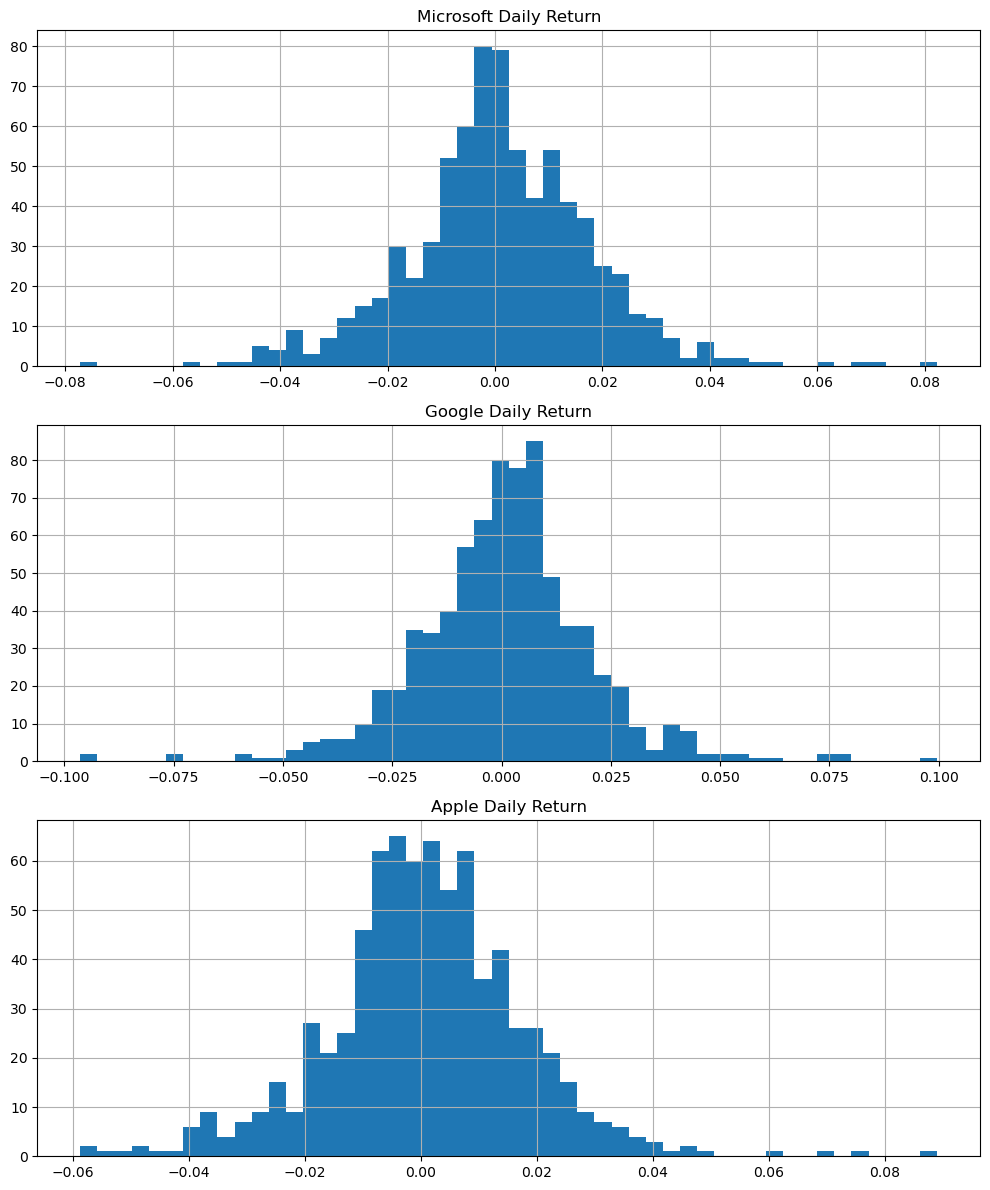

In [169]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

daily_pct_msft.hist(ax=axs[0], bins=50)
axs[0].set_title('Microsoft Daily Return')

daily_pct_goog.hist(ax=axs[1], bins=50)
axs[1].set_title('Google Daily Return')

daily_pct_aapl.hist(ax=axs[2], bins=50)
axs[2].set_title('Apple Daily Return')

plt.tight_layout()
plt.show()

### Prediction

#### Microsoft Prediction

In [170]:
df_msft_5, valid_msft, pred_msft = preprocess_data(comp_list[0])

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 0s 5ms/step


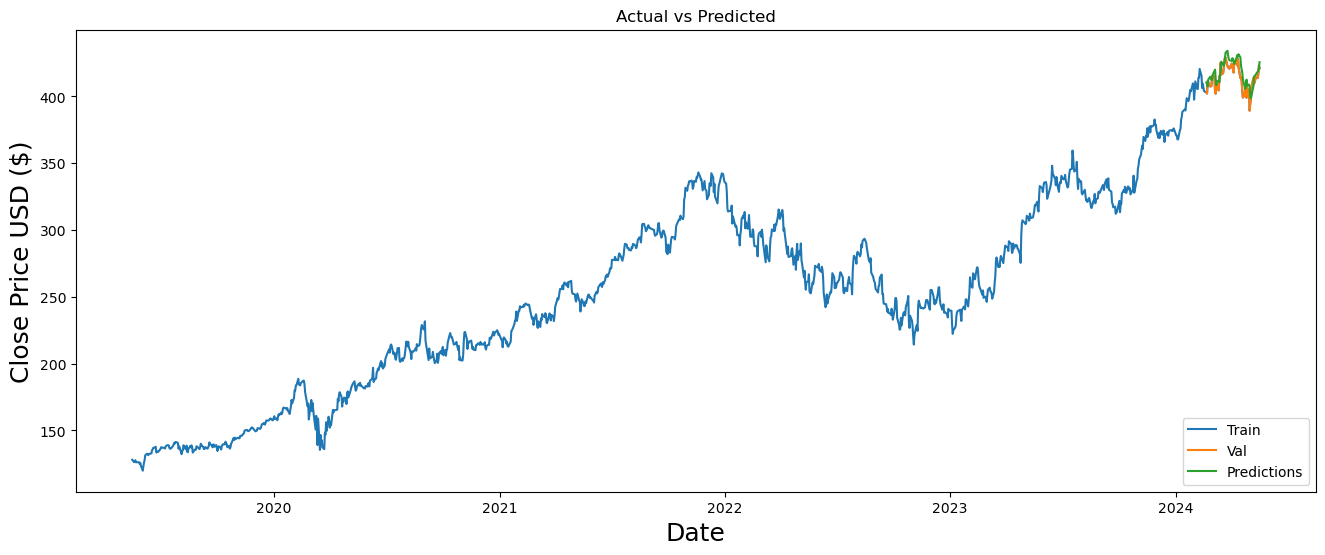

In [171]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_msft_5['Close'])
plt.plot(valid_msft[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [172]:
# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_msft_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_msft[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

Hold the stock.


#### Google Prediction

In [173]:
df_goog_5, valid_goog, pred_goog = preprocess_data(comp_list[2])

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 0s 6ms/step


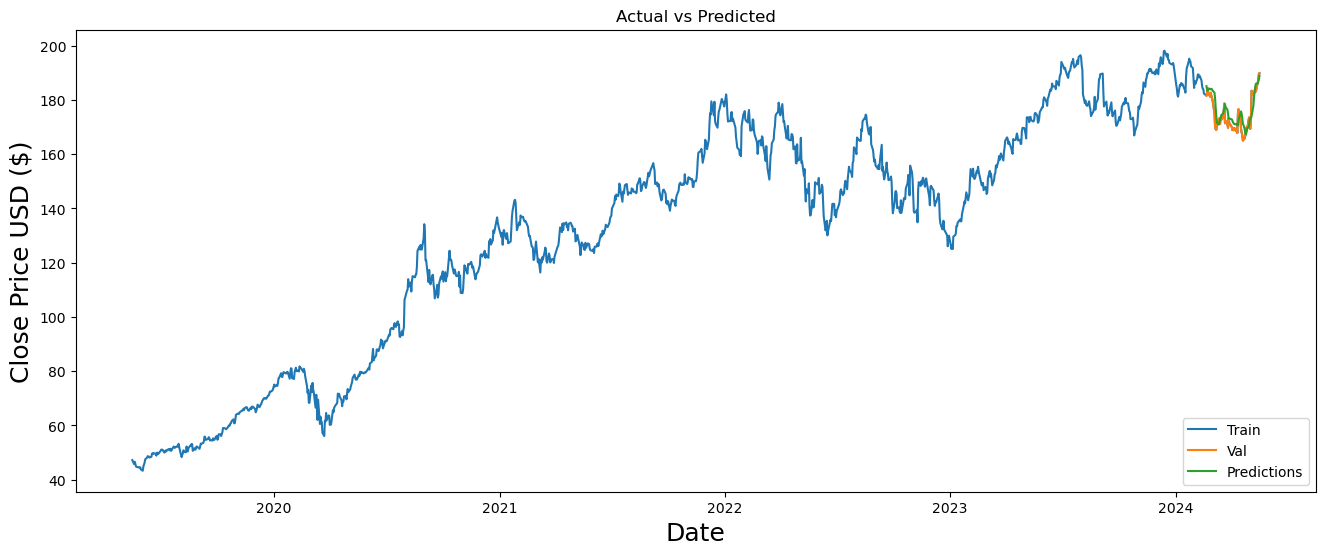

In [174]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_goog_5['Close'])
plt.plot(valid_goog[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [175]:
# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_goog_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_goog[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

Hold the stock.


#### Apple Prediction

In [176]:
df_aapl_5, valid_aapl, pred_aapl = preprocess_data(comp_list[2])

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 6ms/step


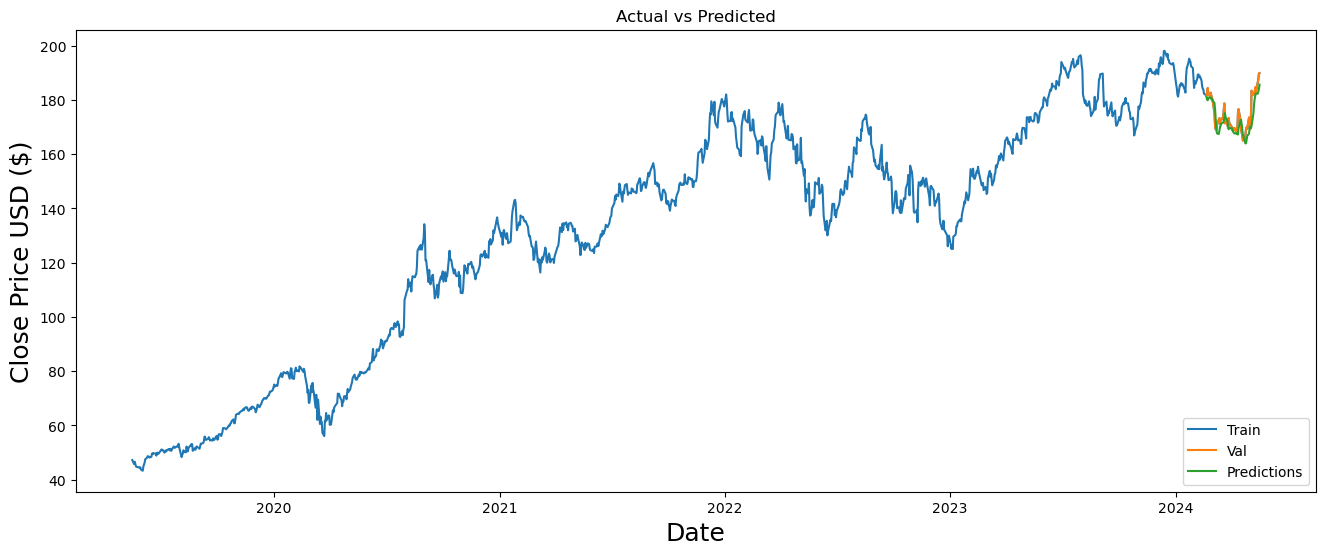

In [177]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_aapl_5['Close'])
plt.plot(valid_aapl[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [178]:
# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_aapl_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_aapl[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

Hold the stock.


### Conclusion

Over the 3 stocks, Apple and Microsoft have the closest correlation in performance as compared to Google. A close eye in Apple and Microsoft performance would be recommended as there are chances that both stocks may experience drastic increase in stock price regarding their recent annoucements in products and the AI boom. For each stock, the model predicts that it would be best to hold onto any stock you may have and not buy their stock. 

Considering Google's performance and downward trend, holding onto any stock you have is ideal as you will have to ride out its stock drop until it can recover. Regarding its drop, there are high chances it will continue to drop and it would be best to wait until the drop begins to curve and begin to invest before it goes back up.

Microsoft has been experiencing exceptional performance in recent months regarding its performance reports and becoming viewed as the most valuable company, beating Apple in stock performance. There are chances that the stock will increase in value as it continues to experience an upward trend that beats its moving average. It would be best to hold the stock. If there were plans to purchase stock, it would not be recommended to do so and wait for a sudden drop instead. Purchase in the stock would not lead to fast recovery and instead possible loss considering how drastically different Microsoft's stock to other popular tech stocks, it may be overvalued.

Viewing Apple's stock performance, it experiences a stock performance that randomly experiences up and down trends. Although it did experience a significant upward trend in 2023. It has been struggling to maintain that trend. The stock is seen to be struggling to keep up with its moving average. With the stock's recent performance and model, it would be recommended to hold any stock you may have purchased and not to sell, if you plan to buy, do not purchase a large amount of the stock. Purchasing the stock can lead to a possible return regarding Apple's recent annoucement with its new M4 Chip, it has been now experiencing an upward trend but not enough to fully encourage buying as much as possible.

For myself, I chose to avoid buying Google and stock and Microsoft stock but have chosen to purchase Apple stock, considering their recent annoucement and stock rise that has almost beat its moving average. I believe the stock will provide a good daily return as compared Microsoft and Google.

## Goldman Sachs Analysis

### Closing Price

In [16]:
fig = px.line(df_gs, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

Judging from the stock price data, Goldman Sachs has been experiencing a upward trend since January 2024. The reason for this trend could be attributed to the people selling their stock in companies such as Nvidia after it reached the 900 dollar stock price mark. As Goldman Sachs is an investment firm, its stock rises through optimism in the companies view of the market as well as for investors to hold their money after selling in other companies.

### Simple Moving Average (SMA)

In [180]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_gs[column_name] = df_gs['Adj Close'].rolling(ma).mean()


Text(0.5, 1.0, 'Goldman Sachs Moving Average')

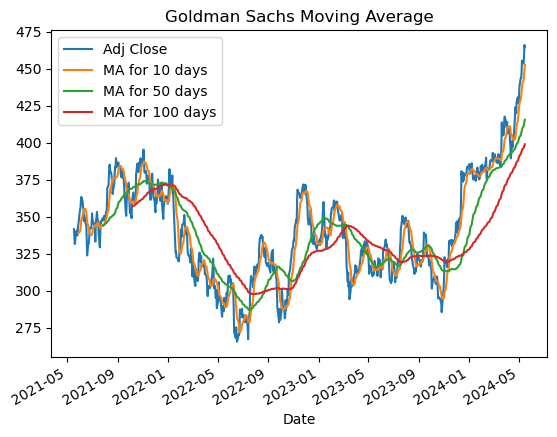

In [181]:
df_gs[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Goldman Sachs Moving Average")

### Volatility Calculation

Text(0.5, 1.0, 'Goldman Sachs Volatility')

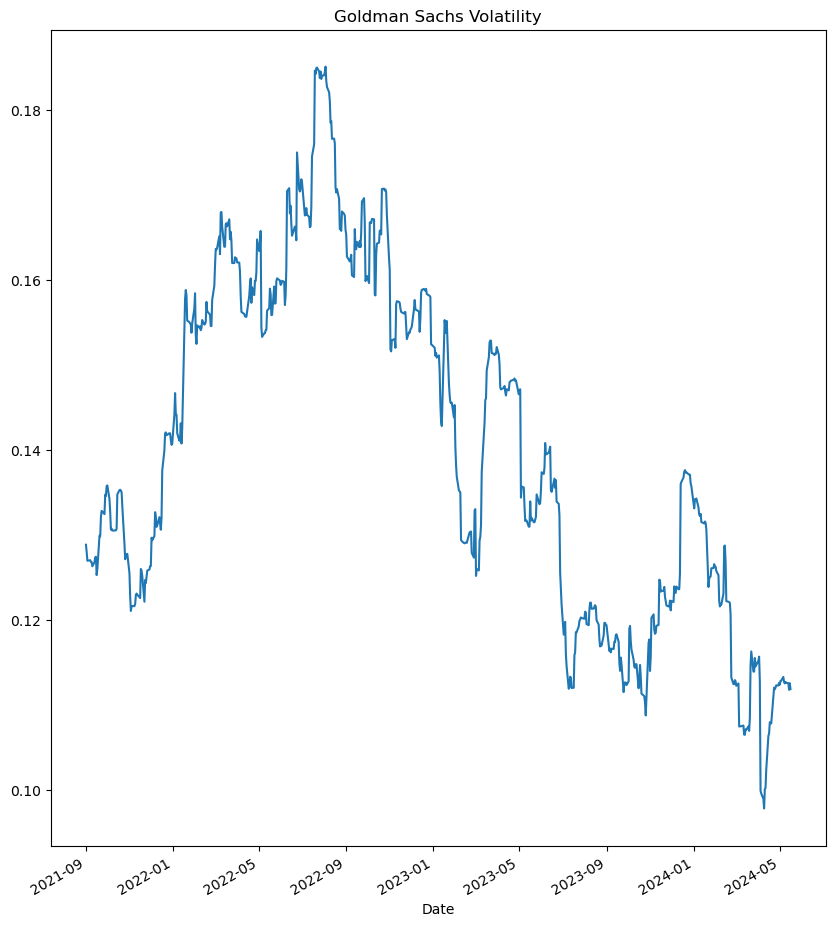

In [182]:
min_periods = 75
vol_gs = df_gs['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)

vol_gs.plot(figsize=(10,12))
plt.title("Goldman Sachs Volatility")

### Daily Return

Text(0.5, 1.0, 'Goldman Sachs Daily Return')

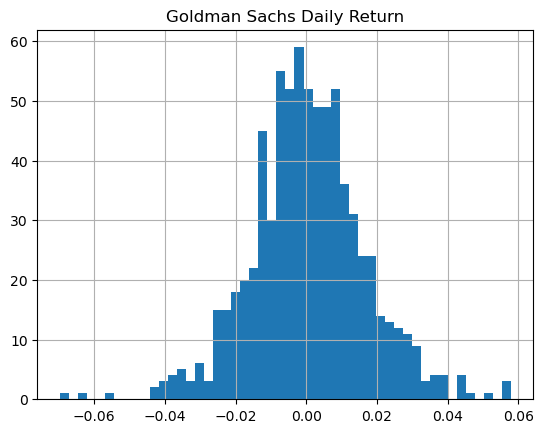

In [183]:
daily_close = df_gs['Adj Close']
daily_pct_gs = daily_close.pct_change()
daily_pct_gs.fillna(0,inplace=True)

daily_pct_gs.hist(bins = 50)
plt.title("Goldman Sachs Daily Return")

### Prediction

In [184]:
df_gs_5, valid_gs, pred_gs = preprocess_data(comp_list[0])

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 0s 6ms/step


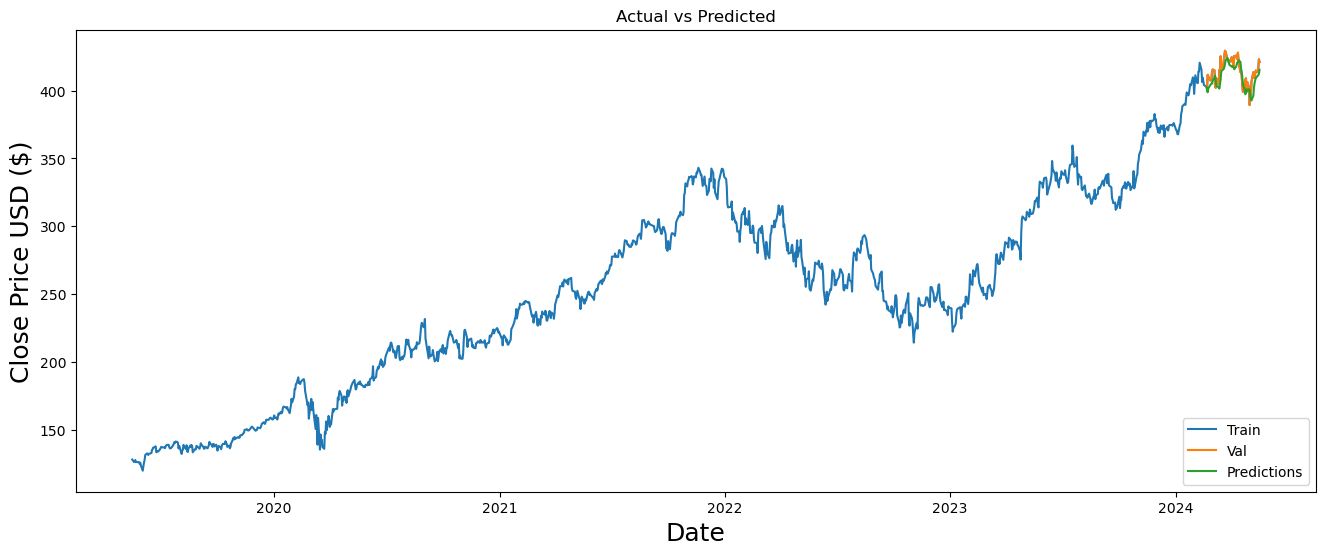

In [185]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Actual vs Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_gs_5['Close'])
plt.plot(valid_gs[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [186]:
# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_gs_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_gs[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

Hold the stock.


### Conclusion

In conclusion, Goldman Sachs would be a good investment in the matter of safety investment consideirng what the point of the stock is. As it is an investment firm, the more trust in their choices provides more confidence in people's investment into them. Goldman Sachs is seen to be experiencing an upward trend that is beating its expected average. This lines up with the company's announcements regards what stocks to invest into and what stocks to watch, from it they were able to rise in stock a considerable amount. The stock provides a more positive daily return from investments with a low volatility, leading this to be a safe investment. Although it is predicted to hold onto any stock that you may have as the stock is still rising it not be ideal to sell the stock. Buying the stock now is not recommended fully due to the stock not being at a considerably good low price considering the stock is past its average and rising a positive trend. Although, it would be worth investing onto the stock now to ride its trend instead of waiting for it to fall down the market again.

I have chosen to invest into Goldman Sachs out of recommendation from other classmates due to the company's considerable rise in stock. When viewing the data of the company, it can be seen to be a safe investment that will provide considerable return if invested now.

# Report (5-13 to 5-17) Week 3

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from datetime import datetime

# yahoo Finance API library (useful?)
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM

from pandas_datareader import data as pdr
yf.pdr_override()

Investigate further stocks regarding the chip industry such as TSM as well as final review on currently held stocks to see if they are worth selling or keeping in the final week.

Final Analysis on Chip Industry Stocks

Final Analysis on Other Stocks we have invested.

Anaylsis on Tesla

Total Stocks:

AAPL, AMD, GOOG, GS, NVDA, TSLA, AMZN

In [188]:
cpu_list = ['NVDA', 'INTC','AMD', 'TSM']

comp_list = ['MSFT','GOOG', 'AAPL', 'AMZN']

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

Data is drastically changed from 3 year span to 2 year span

In [189]:
for stock in cpu_list:
    globals()[stock] = yf.download(stock, start, end)

df_nvda = globals()['NVDA']
df_amd = globals()['AMD']
df_intc = globals()['INTC']
df_tsm = globals()['TSM']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [190]:
for stock in comp_list:
    globals()[stock] = yf.download(stock, start, end)

df_msft = globals()['MSFT']
df_goog = globals()['GOOG']
df_aapl = globals()['AAPL']
df_amzn = globals()['AMZN']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [191]:
globals()['GS'] = yf.download('GS', start, end)
df_gs = globals()['GS'] 

globals()['TSLA'] = yf.download('TSLA', start, end)
df_tsla = globals()['TSLA'] 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### Model Preparation 

Spreads data to five years instead of three years

In [192]:
def preprocess_data(stock_symbol, epochs=100, batch_size=32, window_size=60):
    # Fetch data
    end = datetime.now()
    start = datetime(end.year - 5, end.month, end.day)
    df = pdr.get_data_yahoo(stock_symbol, start=start, end=end)

    data = df.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * .95))

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(dataset)

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size])

    X, y = np.array(X), np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    # Make predictions
    test_data = scaled_data[training_data_len - window_size:, :]
    test_set = []
    for i in range(window_size, len(test_data)):
        test_set.append(test_data[i-window_size:i, 0])

    test_set = np.array(test_set)
    test_set = np.reshape(test_set, (test_set.shape[0], test_set.shape[1], 1))

    prediction = model.predict(test_set)
    scaled_pred = scaler.inverse_transform(prediction)

    # Prepare results
    valid = data[training_data_len:]
    valid['Predictions'] = scaled_pred

    return df, valid, scaled_pred

### Goldman Sachs Anaylsis 

#### Closing Price

In [19]:
fig = px.line(df_gs, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

#### Simple Moving Average (SMA)

Text(0.5, 1.0, 'Goldman Sachs Moving Average')

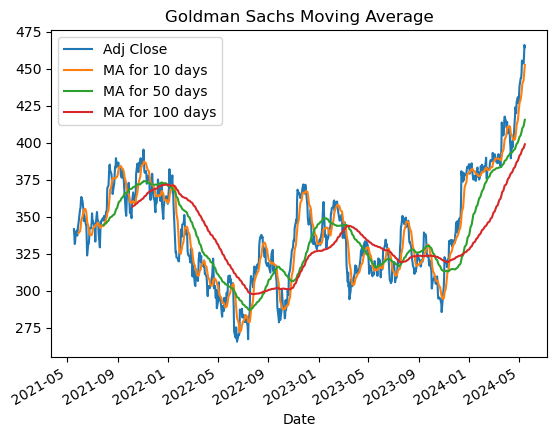

In [194]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_gs[column_name] = df_gs['Adj Close'].rolling(ma).mean()


df_gs[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Goldman Sachs Moving Average")

### Tesla Analysis 

#### Closing Price

In [195]:
fig = px.line(df_tsla, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

#### Simple Moving Average (SMA)

Text(0.5, 1.0, 'Tesla Moving Average')

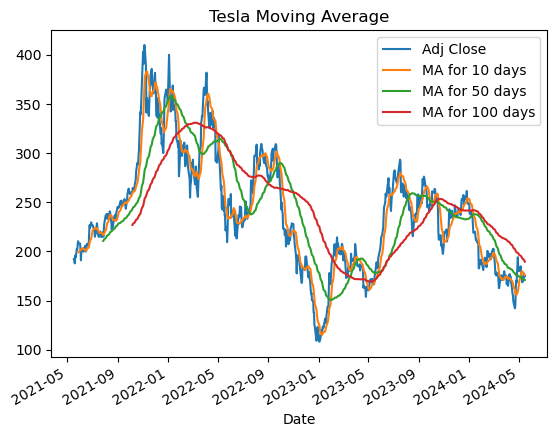

In [196]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_tsla[column_name] = df_tsla['Adj Close'].rolling(ma).mean()


df_tsla[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Tesla Moving Average")

### Daily Return Calculation - Tesla and Goldman Sachs

In [197]:
daily_close = df_tsla['Adj Close']
daily_pct_tsla = daily_close.pct_change()
daily_pct_tsla.fillna(0,inplace=True)

daily_close = df_gs['Adj Close']
daily_pct_gs = daily_close.pct_change()
daily_pct_gs.fillna(0,inplace=True)

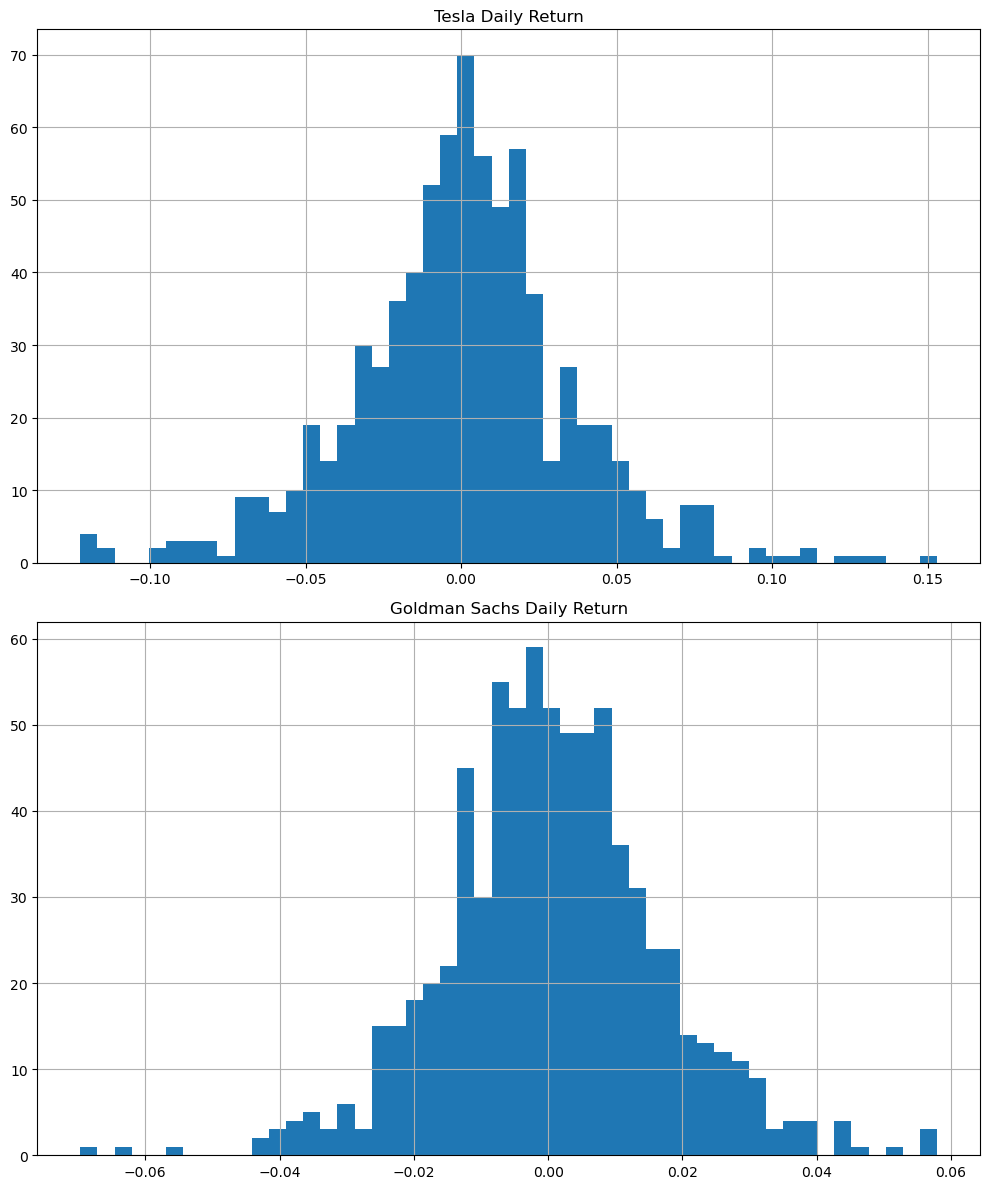

In [198]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

daily_pct_tsla.hist(ax=axs[0], bins=50)
axs[0].set_title('Tesla Daily Return')

daily_pct_gs.hist(ax=axs[1], bins=50)
axs[1].set_title('Goldman Sachs Daily Return')

plt.tight_layout()
plt.show()

### Prediction - Tesla & Goldman Sachs

#### Tesla Prediction

In [199]:
df_tsla_5, valid_tsla, pred_tsla = preprocess_data('TSLA')

# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_tsla_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_tsla[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 11ms/step
Hold the stock.


#### Goldman Sachs Prediction

In [200]:
df_gs_5, valid_gs, pred_gs = preprocess_data('GS')

# Inpsiration Taken From Tyler Nguyen-Uyemori's Notebook
current_price = df_gs_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_gs[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 10ms/step
Hold the stock.


### Conclusion on Investment for Goldman Sachs and Tesla

From what can be seen for Tesla, it is recommended by the prediction model to hold onto any stock we may have. This would make sense due to the downward trend the stock is experiencing. It would make the most sense to hold on to any stock for now. But it is best to wait until the stock reaches a point at or higher than when you bought to make back any losses. Considering its volatility, choosing to purchase an option or to short the stock may be too risky.

Based on the performance of Goldman Sachs, I believe that purchasing an option call for Goldman Sachs considering its notable upward trend that has continued since last week. A bet that the stock will rise is guaranteed. With it moving greater than its average and good daily return.

### Analysis of Chip Industry Companies

In [201]:
# Nvidia, AMD, Intel, TSMC - Chip Analysis
col_nvda = df_nvda['Adj Close']
col_amd = df_amd['Adj Close']
col_intc = df_intc['Adj Close']
col_tsm = df_tsm['Adj Close']

col_df = pd.concat([col_nvda, col_amd, col_intc, col_tsm], axis=1)
col_df.columns = ['NVDA', 'AMD', 'INTC', 'TSM']

#### Performance Summary

In [202]:
fig = px.line(col_df, y=['AMD', 'INTC', 'TSM'], title = 'Closing Prices of Stocks')
fig.show()

#### Individual Performance - TSM

In [203]:
fig_nvda = px.line(df_nvda, y=['Adj Close'], title='Nvidia Stock Performance')

fig_amd = px.line(df_amd, y=['Adj Close'], title='AMD Stock Performance')

fig_intc = px.line(df_intc, y=['Adj Close'], title='Intel Stock Performance')

fig_tsm = px.line(df_tsm, y=['Adj Close'], title='TSM Stock Performance')

# fig_nvda.show()
# fig_amd.show()
# fig_intc.show()
fig_tsm.show()

#### TSM Volatility Data

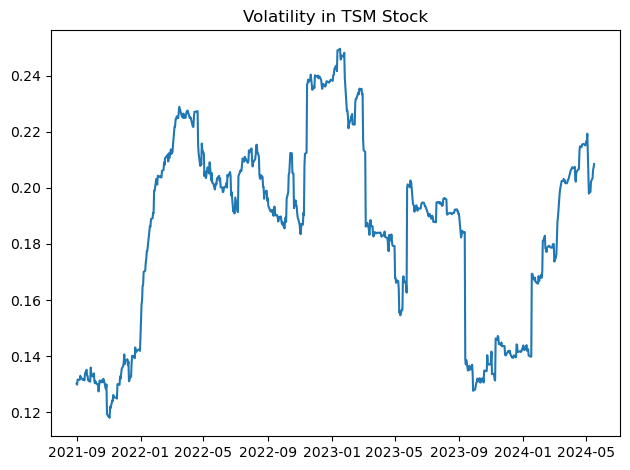

In [204]:
min_periods = 75
vol_tsm = df_tsm['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)

plt.plot(vol_tsm)
plt.title('Volatility in TSM Stock')

plt.tight_layout()
plt.show()

#### Daily Return

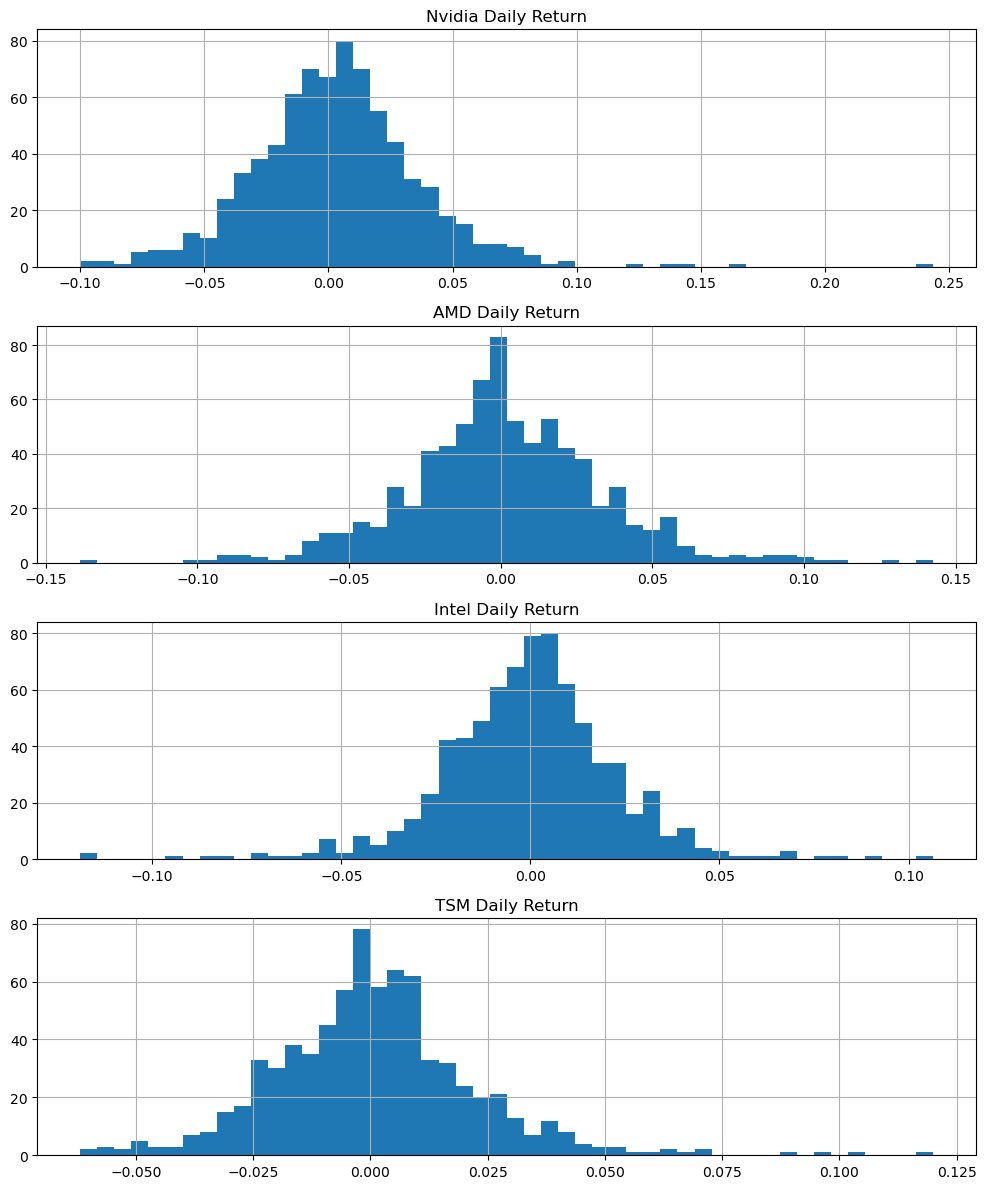

In [205]:
daily_close = df_nvda['Adj Close']
daily_pct_nvda = daily_close.pct_change()
daily_pct_nvda.fillna(0,inplace=True)

daily_close = df_amd['Adj Close']
daily_pct_amd = daily_close.pct_change()
daily_pct_amd.fillna(0,inplace=True)

daily_close = df_intc['Adj Close']
daily_pct_intc = daily_close.pct_change()
daily_pct_intc.fillna(0,inplace=True)

daily_close = df_tsm['Adj Close']
daily_pct_tsm = daily_close.pct_change()
daily_pct_tsm.fillna(0,inplace=True)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

daily_pct_nvda.hist(ax=axs[0], bins=50)
axs[0].set_title('Nvidia Daily Return')

daily_pct_amd.hist(ax=axs[1], bins=50)
axs[1].set_title('AMD Daily Return')

daily_pct_intc.hist(ax=axs[2], bins=50)
axs[2].set_title('Intel Daily Return')

daily_pct_tsm.hist(ax=axs[3], bins=50)
axs[3].set_title('TSM Daily Return')

plt.tight_layout()
plt.show()

Since the data was reviewed last week, The data would still be closely the same or have very little change. Thus we will focus on if the data of TSM is affected by the other companies of the Chip Industry and if it has a good enough foothold to be invested into.

#### Correlation Analysis

In [206]:
da_nvda = df_nvda['Adj Close'].pct_change()
da_amd = df_amd['Adj Close'].pct_change()
da_intc = df_intc['Adj Close'].pct_change()
da_tsm = df_tsm['Adj Close'].pct_change()

da_df = pd.concat([da_nvda,da_amd,da_intc,da_tsm], axis=1)
da_df.columns = ['NVDA','AMD', 'INTEL', 'TSM']

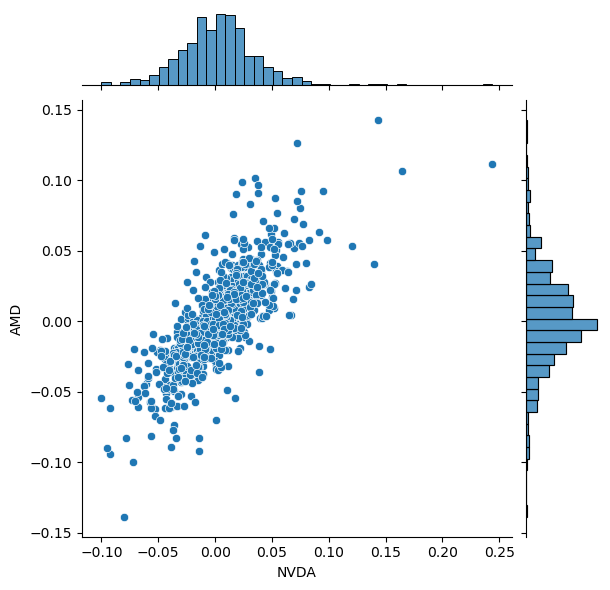

In [207]:
sns.jointplot(da_df, x = 'NVDA', y='AMD', kind='scatter')


From this we can see if two stocks are positively correlated with each other in a linear relationship between their daily return.

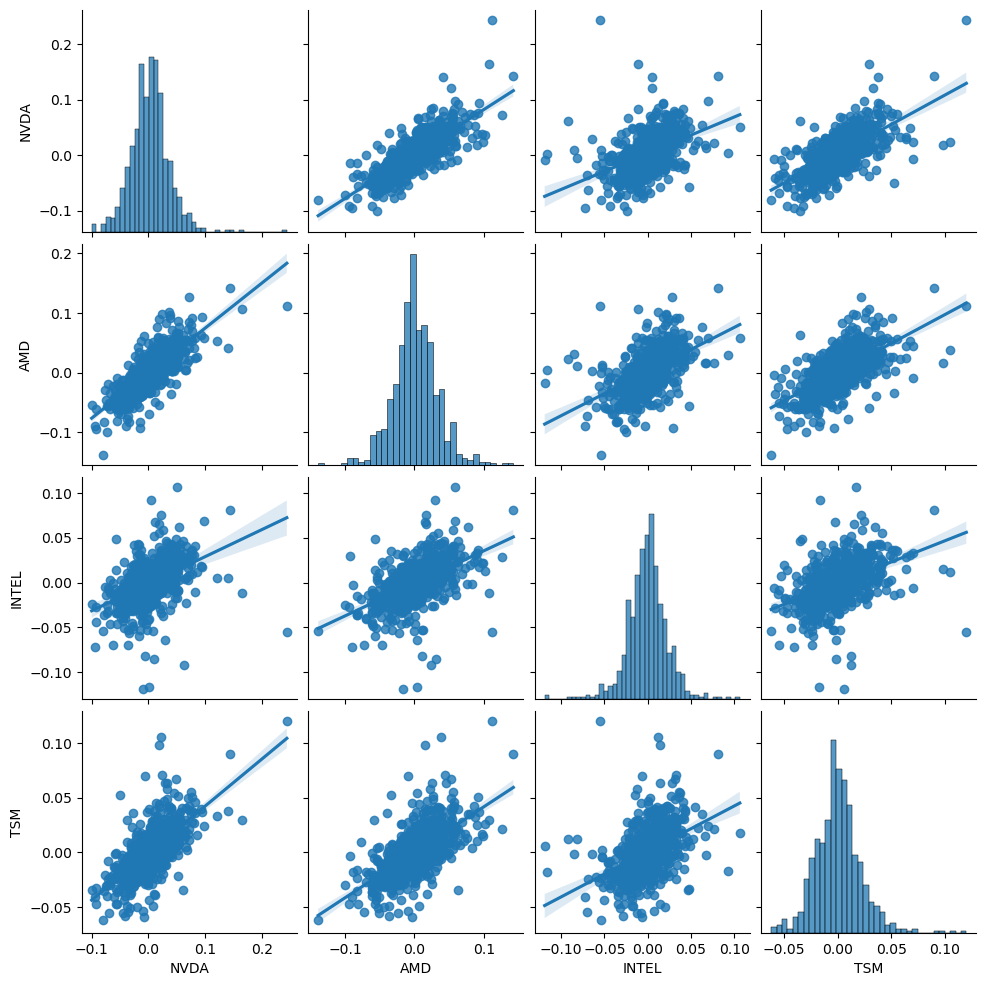

In [208]:
sns.pairplot(da_df, kind='reg')

From this we can see all the relationships between our tech stock's daily return. Judging from the plots, it is interesting that TSM has weaker correlation compared to many of the other companies although mainly for Intel. Among all the companies. AMD and Nvidia have the strongest correlation based on what we can visually see.

Text(0.5, 1.0, 'Correlation of stock closing price')

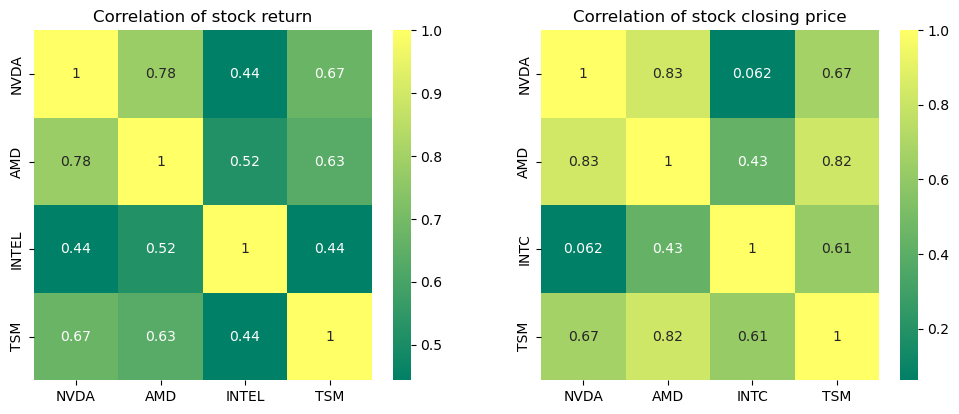

In [209]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(da_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(col_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Looking at a numerical view, observations were correct on the view that Nvidia and AMD have a strong correlation compared to the other companies involved in the Chip industry. The reason for this could be due to the close competition that Nvidia and AMD have regarding their improvements and innovations in both AI and CPUs. TSM is close behind but can be seen to have a weaker correlation than compared to the two with Intel having a very weak correlation and thus having a weak impact to other stocks.

#### Nvidia Prediction

In [210]:
df_nvda_5, valid_nvda, pred_nvda = preprocess_data(cpu_list[0])

current_price = df_nvda_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_nvda[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 12ms/step
Hold the stock.


#### Intel Prediction

In [211]:
df_intc_5, valid_intc, pred_intc = preprocess_data(cpu_list[1])

current_price = df_intc_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_intc[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 12ms/step
Hold the stock.


#### AMD Prediction

In [212]:
df_amd_5, valid_amd, pred_amd = preprocess_data(cpu_list[2])

current_price = df_amd_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_amd[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 13ms/step
Hold the stock.


#### TSM Prediction

In [213]:
df_tsm_5, valid_tsm, pred_tsm = preprocess_data(cpu_list[3])

current_price = df_tsm_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_tsm[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 12ms/step
Hold the stock.


### Chip Industry Analysis Conclusion

Based on this analysis, I believe TSM (Taiwan Semiconductor Manufacturing) would be a good investment but it would be best to wait for it to drop. Looking at its performance, the stock is very volatile in its rise and fall trends, its daily return shows a less chance to rise compared to other stocks such as AMD or Nvidia that have a 5% daily return chance for rise or drop. Aiming to say that it follows a slower pace of change as compared to the other stocks.

Considering the performance of Intel and in recent news of exports to Huawei Technologies being banned, Intel may be affected negatively from all the problems coming its way. Considering this and Intel's notable downward trend, shorting the stock will be a good course of action due to the belief that Intel's stock will further fall.

### Tech Industry Analysis

Apple, AMD, Google, Amazon

In [214]:
col_msft = df_msft['Adj Close']
col_goog = df_goog['Adj Close']
col_aapl = df_aapl['Adj Close']
col_amzn = df_amzn['Adj Close']

col_df = pd.concat([col_msft,col_goog,col_aapl,col_amzn], axis=1)
col_df.columns = ['MSFT','GOOG', 'AAPL', 'AMZN']

Chose to include Amazon although it is mainly a online retailer, this is because they have a strong impact in the tech industry with their cloud services (AWS) that may play a role in correlation with Google and Microsoft.

#### Closing Prices

In [215]:
fig = px.line(col_df, y=['MSFT','GOOG', 'AAPL', 'AMZN'], title='Closing Prices of Stocks')
fig.show()

In [216]:
fig = px.line(col_df, y=['GOOG', 'AAPL', 'AMZN'], title='Closing Prices of Stocks')
fig.show()

#### Individual Performance

In [217]:
fig_msft = px.line(df_msft, y=['Adj Close'], title='Microsoft Stock Performance')

fig_goog = px.line(df_intc, y=['Adj Close'], title='Google Stock Performance')

fig_aapl = px.line(df_aapl, y=['Adj Close'], title='Apple Stock Performance')

fig_amzn = px.line(df_amzn, y=['Adj Close'], title='Amazon Stock Performance')

fig_msft.show()
fig_goog.show()
fig_aapl.show()
fig_amzn.show()

#### Simple Moving Average (SMA)

Text(0.5, 1.0, 'Amazon Moving Average')

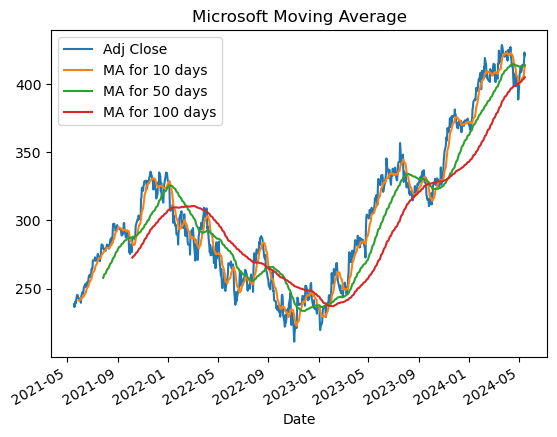

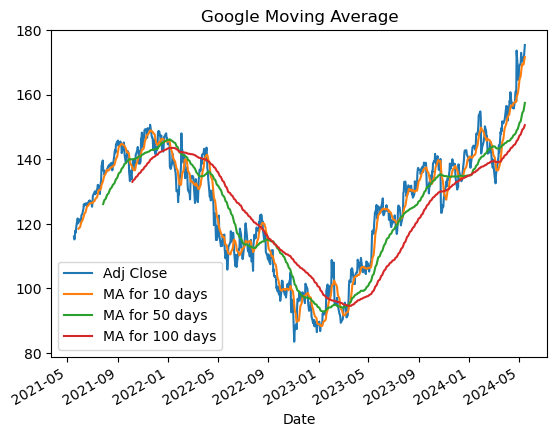

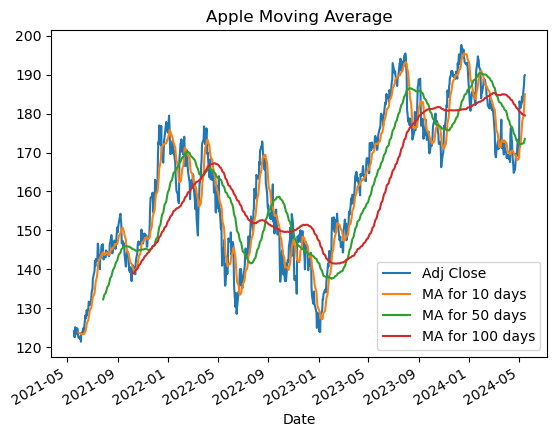

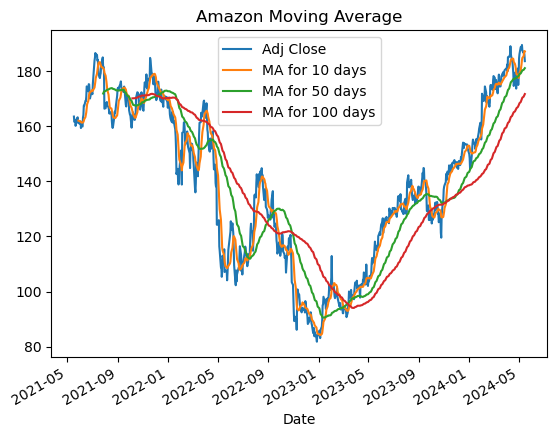

In [218]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_msft[column_name] = df_msft['Adj Close'].rolling(ma).mean()
    df_goog[column_name] = df_goog['Adj Close'].rolling(ma).mean()
    df_aapl[column_name] = df_aapl['Adj Close'].rolling(ma).mean()
    df_amzn[column_name] = df_amzn['Adj Close'].rolling(ma).mean()

df_msft[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Microsoft Moving Average")

df_goog[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Google Moving Average")

df_aapl[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Apple Moving Average")

df_amzn[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot()
plt.title("Amazon Moving Average")


#### Volatility Calculation

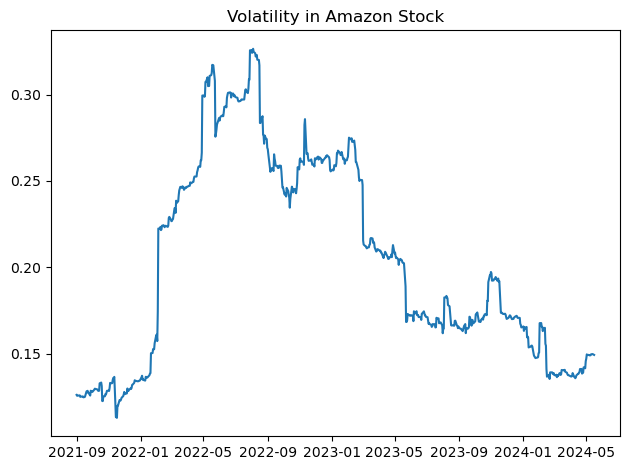

In [219]:
min_periods = 75
vol_amzn = df_amzn['Adj Close'].pct_change().rolling(min_periods).std() * np.sqrt(min_periods)

plt.plot(vol_amzn)
plt.title('Volatility in Amazon Stock')

plt.tight_layout()
plt.show()

#### Daily Return 

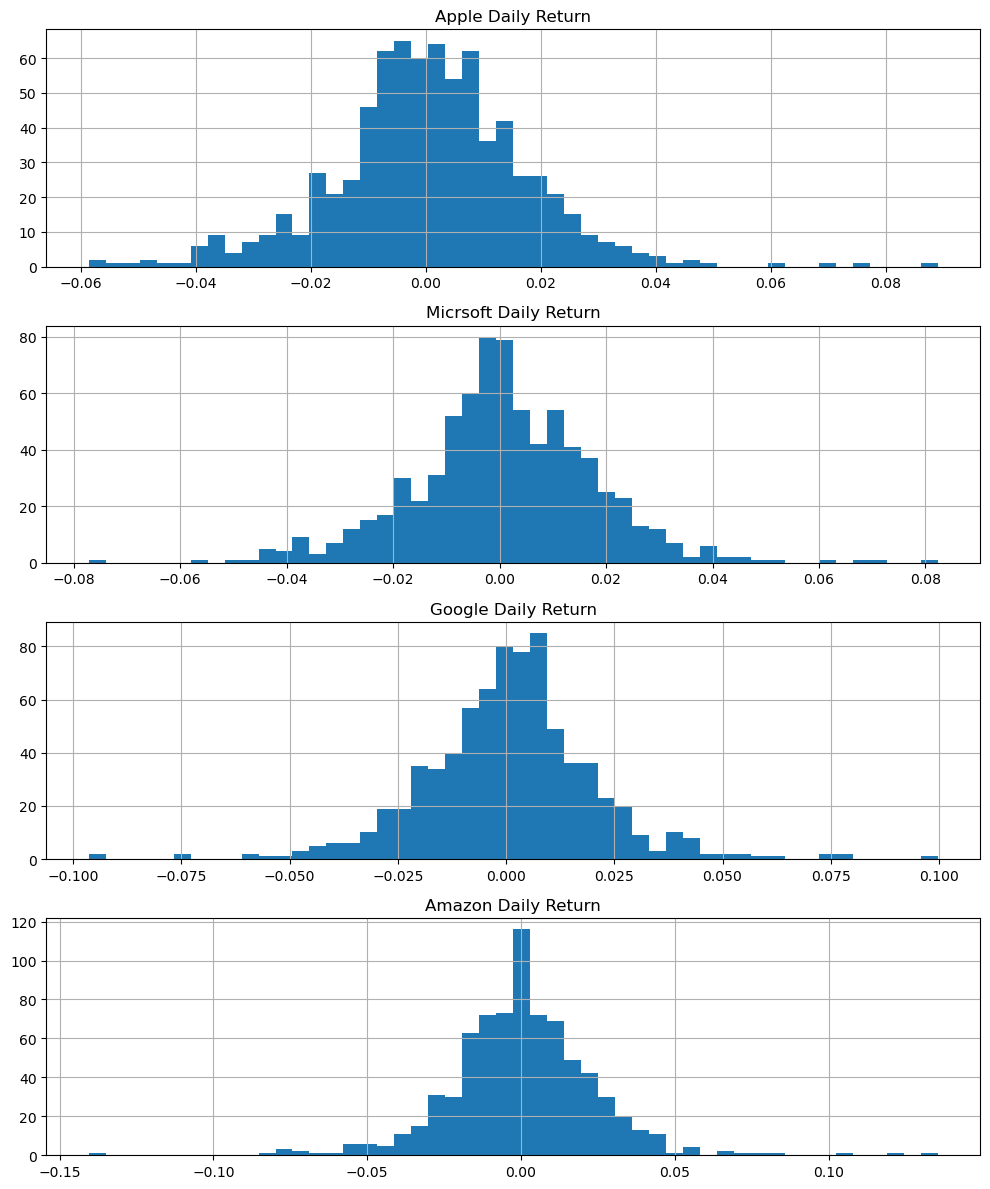

In [220]:
daily_close = df_aapl['Adj Close']
daily_pct_aapl = daily_close.pct_change()
daily_pct_aapl.fillna(0,inplace=True)

daily_close = df_msft['Adj Close']
daily_pct_msft = daily_close.pct_change()
daily_pct_msft.fillna(0,inplace=True)

daily_close = df_goog['Adj Close']
daily_pct_goog = daily_close.pct_change()
daily_pct_goog.fillna(0,inplace=True)

daily_close = df_amzn['Adj Close']
daily_pct_amzn = daily_close.pct_change()
daily_pct_amzn.fillna(0,inplace=True)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

daily_pct_aapl.hist(ax=axs[0], bins=50)
axs[0].set_title('Apple Daily Return')

daily_pct_msft.hist(ax=axs[1], bins=50)
axs[1].set_title('Micrsoft Daily Return')

daily_pct_goog.hist(ax=axs[2], bins=50)
axs[2].set_title('Google Daily Return')

daily_pct_amzn.hist(ax=axs[3], bins=50)
axs[3].set_title('Amazon Daily Return')

plt.tight_layout()
plt.show()

#### Correlation Analysis

In [221]:
da_msft = df_msft['Adj Close'].pct_change()
da_goog = df_goog['Adj Close'].pct_change()
da_aapl = df_aapl['Adj Close'].pct_change()
da_amzn = df_amzn['Adj Close'].pct_change()

da_df = pd.concat([da_msft,da_goog,da_aapl,da_amzn], axis=1)
da_df.columns = ['MSFT','GOOG', 'AAPL', 'AMZN']

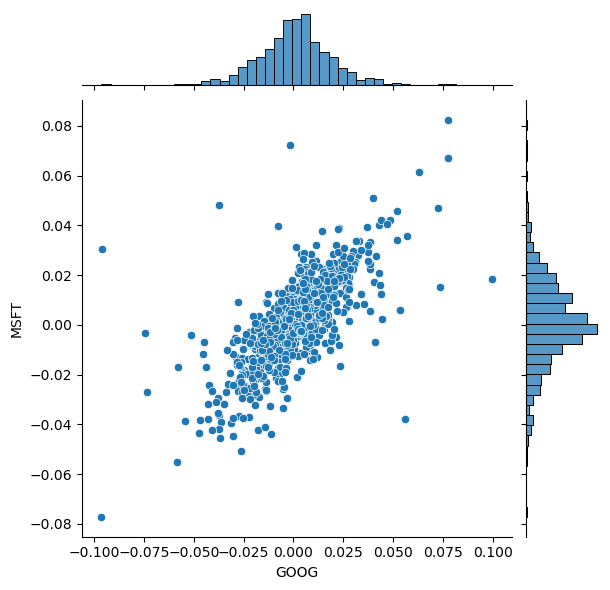

In [222]:
sns.jointplot(da_df, x = 'GOOG', y='MSFT', kind='scatter')


From this we can see if two stocks are positively correlated with each other in a linear relationship between their daily return.

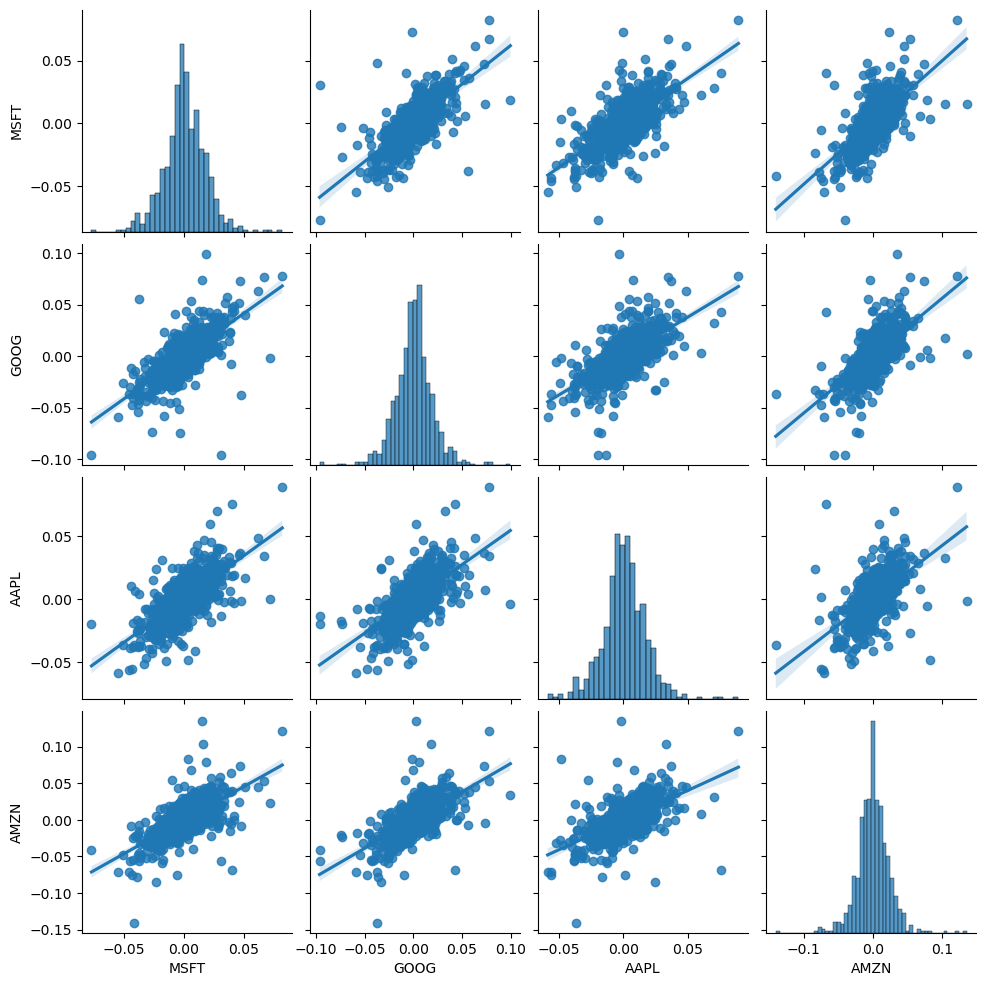

In [223]:
sns.pairplot(da_df, kind='reg')


From this we can see all the relationships between our tech stock's daily return. Judging from the plots, it is interesting that all stocks are closely correlated with each other. However that is in a visual standpoint and we can see many outliers for most of the plots that may play a factor to the stock's correlation. By comparing the daily return, Microsoft seems to have the most interesting correlation between Apple and Google with having a more tighter spread compared to other correlation charts.

Text(0.5, 1.0, 'Correlation of stock closing price')

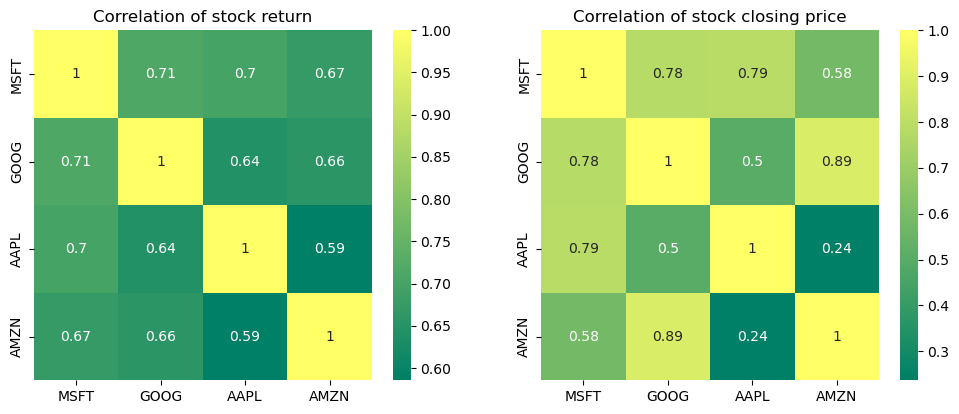

In [224]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(da_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(col_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Looking at a numerical view, the inital view was correct that Microsoft carries a stronger correlation between Apple and Google in stock return and closing price. Comparing between Apple and Google, it interesting to see not too much of a strong correlation. Although all four are seen as tech giants, Microsoft looks to be the biggest competition for each company possibly due to how wide spread its market is. 

Having cloud computing services (Microsoft Azure) and devices and operating systems that are widely used (Windows). Apple usually is popular for its innovative devices thus Microsoft and Apple have a strong correlation with each other. Google and Amazon both have a hand in cloud computing services thus leads to a strong correlation between Microsoft, Amazon, and Google.

### Prediction

#### Microsoft Stock Prediction

In [225]:
df_msft_5, valid_msft, pred_msft = preprocess_data(comp_list[0])

current_price = df_msft_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_msft[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 12ms/step
Hold the stock.


#### Google Stock Prediction

In [226]:
df_goog_5, valid_goog, pred_goog = preprocess_data(comp_list[1])

current_price = df_goog_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_goog[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 14ms/step
Hold the stock.


#### Apple Stock Prediction

In [227]:
df_aapl_5, valid_aapl, pred_aapl = preprocess_data(comp_list[2])

current_price = df_aapl_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_aapl[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 14ms/step
Hold the stock.


#### Amazon Stock Prediction

In [228]:
df_amzn_5, valid_amzn, pred_amzn = preprocess_data(comp_list[3])

current_price = df_amzn_5['Adj Close'].iloc[-1]
threshold = 0.03

predicted_price = pred_amzn[-1]
if predicted_price > current_price * (1 + threshold):
    print("Consider buying the stock.")
elif predicted_price < current_price * (1 - threshold):
    print("Consider selling the stock.")
else:
    print("Hold the stock.")

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 11ms/step
Hold the stock.


### Conclusion for Tech Industry Companies

For Microsoft, it is recommended to hold your stock by the model however I would recommend investing and holding onto Microsoft stock. The reasoning behind this is because of Microsoft's reputation and stead rise over the two years. The company has a hand in many parts of the tech industry that includes cloud computing to its very popular Windows OS. Essentially being the staple in the market that makes it worth investing into and holding for the long term for its increased value.

For Google, it is recommended to hold your stock by the model, I would partly disagree with it and suggest buying a few more stocks regarding this company. The reasoning is due to the positive trend that Google is riding as well as its current improvements into their Gemini AI, there is chances that Google will continue to rise from these results if they continue to improve.

For Apple, it is recommended to hold your stock by the model and I agree with its choice. Since Apple made its recent announcement with the M4 chip, it is recommended to hold your stock to see the outcome of their choice and considering Apple's cult following for its products, there are good reasons to invest and hold now.

For Amazon, it is recommended to hold your stock by the model but I would recommend buying the stock now if you dont have any at the moment. Considering the popularity of Amazon to the general masses and it consistent positive, Amazon can be seen as a "forever" stock. A type of stock will always keep a hold of and watch over many years. Having low volatility with it having a 95% buy rate, Amazon is an safe choice when investing into stocks for the future.

These stocks overall are notable for their long term impact and performance. Seeing them as stocks that will provide notable return in the long term considering these companies are staple companies in the tech industry.